# EDA of AI, CI and AI in CI papers

Notebook based on Kostas's EDA of CI papers from MAG

In [1]:
%run ../notebook_preamble.ipy

In [2]:
import warnings

In [3]:
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [4]:
import ast
from datetime import date
from collections import Counter
import networkx as nx
import itertools
import community
import seaborn as sns

In [5]:
plt.style.use('seaborn')

In [6]:
def flatten_lists(l):
    """Unpacks nested lists into one list of elements.

    Args:
        lst (:obj:`list` of :obj:`list`)

    Returns
        (list)
    
    """
    return [item for sublist in l if sublist for item in sublist if item]

In [7]:
# Read MAG data
mag = pd.read_csv('../../data/interim/mag.csv', index_col=0)
print(f'MAG data shape: {mag.shape}')

MAG data shape: (782037, 14)


In [8]:
mag.columns

Index(['id', 'prob', 'title', 'publication_type', 'year', 'date', 'citations',
       'references', 'doi', 'publisher', 'bibtex_doc_type',
       'inverted_abstract', 'type', 'abstract'],
      dtype='object')

In [172]:
# Merge journalsl & conferences with publication year
journal = pd.read_csv('../../data/interim/journal.csv', index_col=0)
conferences = pd.read_csv('../../data/interim/conferences.csv', index_col=0)

### Proportion of missing values for AI papers

In [10]:
(mag[mag.type=='ai'].isnull().sum() / mag[mag.type=='ai'].shape[0]) * 100

2020-03-09 09:57:36,430 - numexpr.utils - INFO - NumExpr defaulting to 8 threads.


id                    0.000000
prob                  0.000000
title                 0.000000
publication_type     14.448066
year                  0.000000
date                  0.000000
citations             0.000000
references           26.782282
doi                  33.735824
publisher            30.036754
bibtex_doc_type       2.377226
inverted_abstract    18.337217
type                  0.000000
abstract              0.003893
dtype: float64

### Proportion of missing values for CI papers

In [11]:
(mag[mag.type=='ci'].isnull().sum() / mag[mag.type=='ci'].shape[0]) * 100

id                    0.000000
prob                  0.000000
title                 0.000000
publication_type     41.373581
year                  0.000000
date                  0.000000
citations             0.000000
references           40.502785
doi                  38.835041
publisher            29.308594
bibtex_doc_type       2.883166
inverted_abstract    24.062279
type                  0.000000
abstract              0.000000
dtype: float64

### Proportion of missing values for AI in CI papers

In [12]:
(mag[mag.type=='ai_ci'].isnull().sum() / mag[mag.type=='ai_ci'].shape[0]) * 100

id                    0.000000
prob                  0.000000
title                 0.000000
publication_type     16.826295
year                  0.000000
date                  0.000000
citations             0.000000
references           20.069656
doi                  39.268611
publisher            31.388768
bibtex_doc_type       3.308663
inverted_abstract     9.142360
type                  0.000000
abstract              0.000000
dtype: float64

In [13]:
# Top 10 duplicated titles
mag.title.value_counts()[:10]

support vector machines                       26
artificial neural networks                    13
hidden markov models                          13
introduction to machine learning              11
machine learning                              11
semi supervised learning                      11
controller and machine learning device        11
libguides social work websites                10
control device and machine learning device    10
introduction to deep learning                  9
Name: title, dtype: int64

In [14]:
# Duplicated titles example
mag[mag.title=='support vector machines'].head()

,id,prob,title,publication_type,year,date,citations,references,doi,publisher,bibtex_doc_type,inverted_abstract,type,abstract
12823,2613345842,5.719326e-10,support vector machines,NaN,2017,2017-01-01,0,NaN,NaN,NaN,Journal article,NaN,ai,0.0
47534,2948339884,5.277410e-11,support vector machines,NaN,2018,2018-11-16,0,[2043219350],10.1201/9781315209203-9,CRC Press,Journal article,NaN,ai,0.0
66315,2490356951,8.227120e-11,support vector machines,NaN,2014,2014-01-01,0,"[2148603752, 2119821739, 1563088657, 208734743...",10.1016/B978-0-12-410437-2.00004-7,NaN,Journal article,"{""IndexLength"": 158, ""InvertedIndex"": {""This"":...",ai,This chapter introduces the support vector mac...
74961,317456669,1.864235e-10,support vector machines,Book chapter,2009,2009-01-01,0,"[2153635508, 2911964244, 2148603752, 148037683...",10.1017/CBO9781139192903.019,Cambridge University Press,Book chapter,NaN,ai,0.0
98679,3000642484,3.162730e-11,support vector machines,Book chapter,2019,2019-11-07,0,NaN,10.1201/9780367816377-14,Chapman and Hall/CRC,Book chapter,NaN,ai,0.0


First and second examples with DOIs are actually chapters in a book, despite MAG saying they are journal articles

## Number of papers per group (raw frequency)

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

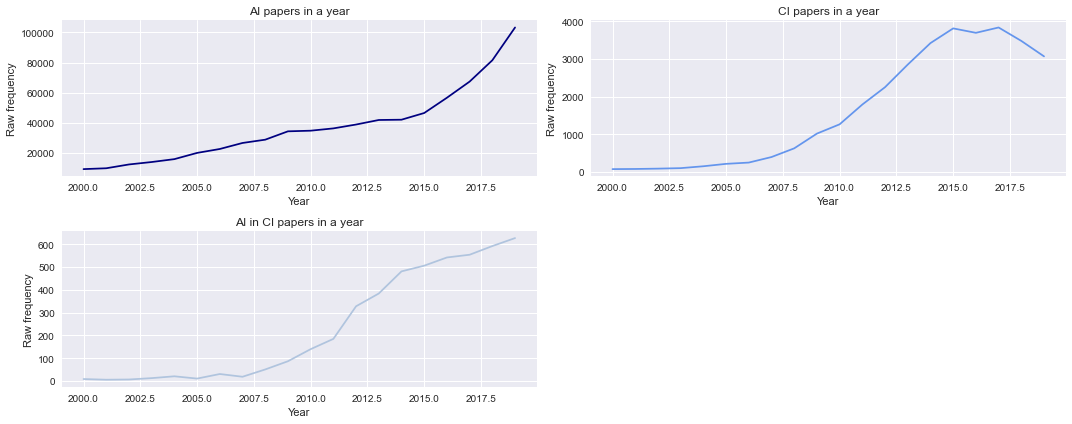

In [15]:
f = plt.figure(figsize=(15,6))
ax1 = plt.subplot2grid((2,2),(0, 0))
ax2 = plt.subplot2grid((2,2),(0, 1))
ax3 = plt.subplot2grid((2,2),(1, 0))


# ax1
mag[mag.type == 'ai'].groupby('year').count()['id'].plot(ax=ax1, color='navy')
ax1.set_title('AI papers in a year')
ax1.set_ylabel('Raw frequency')
ax1.set_xlabel('Year')

# ax2
mag[mag.type == 'ci'].groupby('year').count()['id'].plot(ax=ax2, color='cornflowerblue')
ax2.set_title('CI papers in a year')
ax2.set_ylabel('Raw frequency')
ax2.set_xlabel('Year')

# ax3
mag[mag.type == 'ai_ci'].groupby('year').count()['id'].plot(ax=ax3, color='lightsteelblue')
ax3.set_title('AI in CI papers in a year')
ax3.set_ylabel('Raw frequency')
ax3.set_xlabel('Year')

f.tight_layout()
plt.show()

## Types of publication per group (raw frequency)

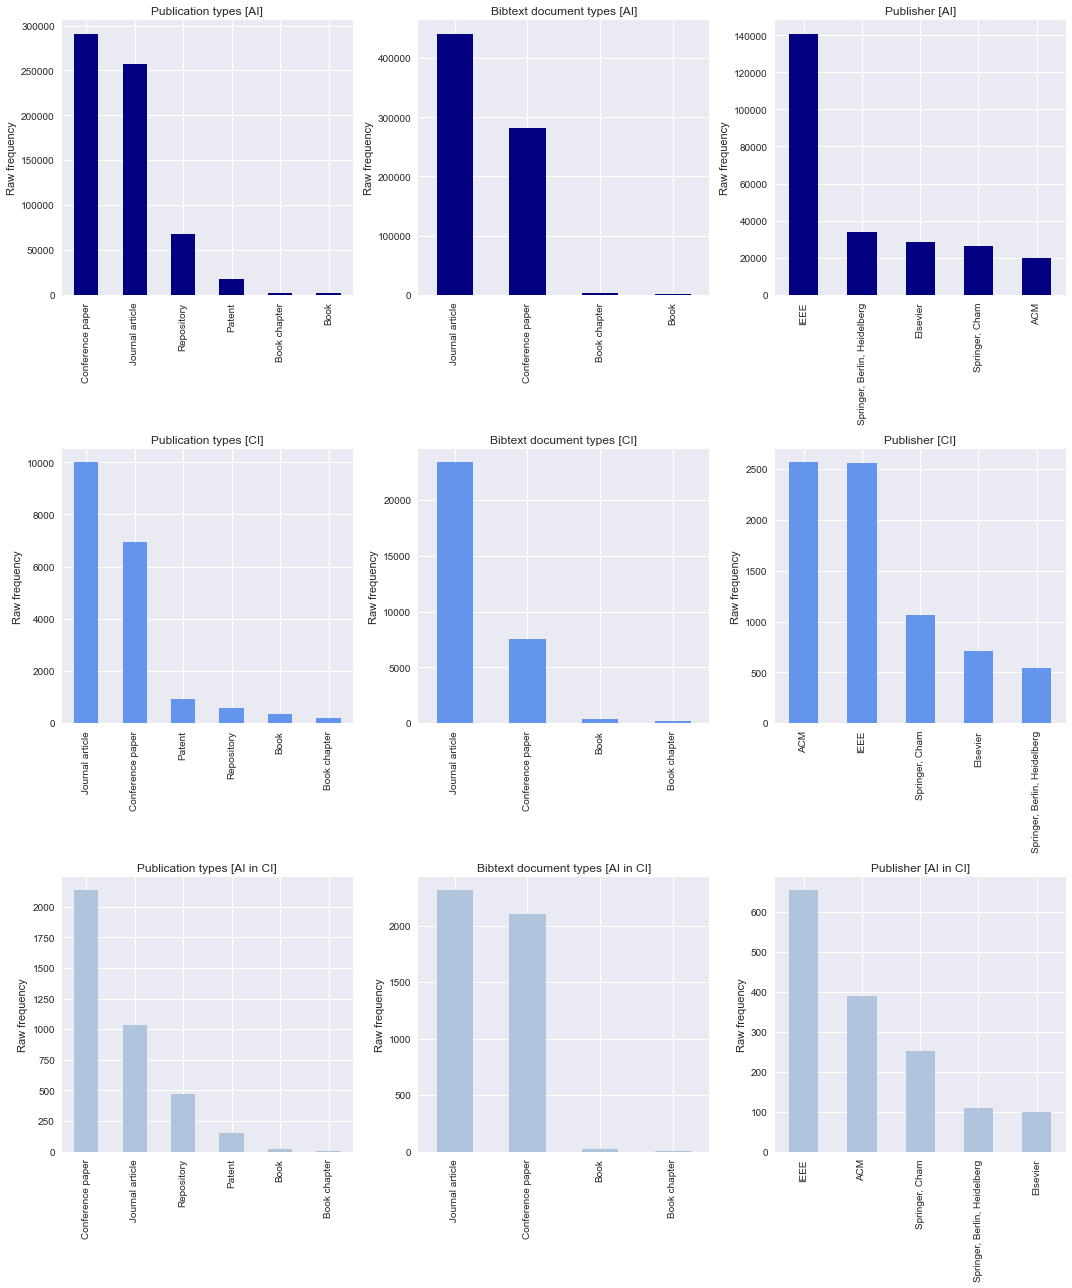

In [16]:
f = plt.figure(figsize=(15,18))
ax1 = plt.subplot2grid((3,3),(0, 0))
ax2 = plt.subplot2grid((3,3),(0, 1))
ax3 = plt.subplot2grid((3,3),(0, 2))
ax4 = plt.subplot2grid((3,3),(1, 0))
ax5 = plt.subplot2grid((3,3),(1, 1))
ax6 = plt.subplot2grid((3,3),(1, 2))
ax7 = plt.subplot2grid((3,3),(2, 0))
ax8 = plt.subplot2grid((3,3),(2, 1))
ax9 = plt.subplot2grid((3,3),(2, 2))


# ax1
mag[mag.type == 'ai'].publication_type.value_counts().plot(kind='bar', ax=ax1, color='navy')
ax1.set_title('Publication types [AI]')
ax1.set_ylabel('Raw frequency')

# ax2
mag[mag.type == 'ai'].bibtex_doc_type.value_counts().plot(kind='bar', ax=ax2, color='navy')
ax2.set_title('Bibtext document types [AI]')
ax2.set_ylabel('Raw frequency')

# ax3
mag[mag.type == 'ai'].publisher.value_counts()[:5].plot(kind='bar', ax=ax3, color='navy')
ax3.set_title('Publisher [AI]')
ax3.set_ylabel('Raw frequency')

# ax1
mag[mag.type == 'ci'].publication_type.value_counts().plot(kind='bar', ax=ax4, color='cornflowerblue')
ax4.set_title('Publication types [CI]')
ax4.set_ylabel('Raw frequency')

# ax2
mag[mag.type == 'ci'].bibtex_doc_type.value_counts().plot(kind='bar', ax=ax5, color='cornflowerblue')
ax5.set_title('Bibtext document types [CI]')
ax5.set_ylabel('Raw frequency')

# ax3
mag[mag.type == 'ci'].publisher.value_counts()[:5].plot(kind='bar', ax=ax6, color='cornflowerblue')
ax6.set_title('Publisher [CI]')
ax6.set_ylabel('Raw frequency')

# ax1
mag[mag.type == 'ai_ci'].publication_type.value_counts().plot(kind='bar', ax=ax7, color='lightsteelblue')
ax7.set_title('Publication types [AI in CI]')
ax7.set_ylabel('Raw frequency')

# ax2
mag[mag.type == 'ai_ci'].bibtex_doc_type.value_counts().plot(kind='bar', ax=ax8, color='lightsteelblue')
ax8.set_title('Bibtext document types [AI in CI]')
ax8.set_ylabel('Raw frequency')

# ax3
mag[mag.type == 'ai_ci'].publisher.value_counts()[:5].plot(kind='bar', ax=ax9, color='lightsteelblue')
ax9.set_title('Publisher [AI in CI]')
ax9.set_ylabel('Raw frequency')

f.tight_layout()
plt.show()

In [17]:
ai_publishers = list(mag[mag.type == 'ai'].publisher.value_counts(normalize=True)[:5].index)
ci_publishers = list(mag[mag.type == 'ci'].publisher.value_counts(normalize=True)[:5].index)
ai_ci_publishers = list(mag[mag.type == 'ai_ci'].publisher.value_counts(normalize=True)[:5].index)
ai_publishers_counts = mag[mag.type == 'ai'].publisher.value_counts(normalize=True)[:5]
ci_publishers_counts = mag[mag.type == 'ci'].publisher.value_counts(normalize=True)[:5]
ai_ci_publishers_counts = mag[mag.type == 'ai_ci'].publisher.value_counts(normalize=True)[:5]

In [18]:
publishers = []

for publisher in ai_publishers:
    if publisher not in publishers:
        publishers.append(publisher)
        
for publisher in ci_publishers:
    if publisher not in publishers:
        publishers.append(publisher)

for publisher in ai_ci_publishers:
    if publisher not in publishers:
        publishers.append(publisher)

In [19]:
ai_count = []
for publisher in publishers:
    if publisher in ai_publishers:
        ai_count.append(ai_publishers_counts[publisher])
    else:
        ai_count.append(0)

ci_count = []
for publisher in publishers:
    if publisher in ci_publishers:
        ci_count.append(ci_publishers_counts[publisher])
    else:
        ci_count.append(0)
        
ai_ci_count = []
for publisher in publishers:
    if publisher in ai_ci_publishers:
        ai_ci_count.append(ai_ci_publishers_counts[publisher])
    else:
        ai_ci_count.append(0)

In [20]:
def multiple_bar_plt(df, column, xlabel, ax):
    # set width of bar
    barWidth = 0.25
 
    # Set position of bar on X axis
    r1 = np.arange(len(list(df[df.type == 'ai'][column].value_counts(normalize=True).sort_index().index)))
    r2 = [x + barWidth for x in r1]
    r3 = [x + barWidth for x in r2]
 
    # Make the plot
    ax.bar(r1, df[df.type == 'ai'][column].value_counts(normalize=True).sort_index(), color='navy', width=barWidth, edgecolor='white', label='AI')
    ax.bar(r2, df[df.type == 'ci'][column].value_counts(normalize=True).sort_index(), color='cornflowerblue', width=barWidth, edgecolor='white', label='CI')
    ax.bar(r3, df[df.type == 'ai_ci'][column].value_counts(normalize=True).sort_index(), color='lightsteelblue', width=barWidth, edgecolor='white', label='AI in CI')
 
    # Add xticks on the middle of the group bars
    ax.set_xlabel(xlabel, fontweight='bold')
    ax.set_ylabel('Normalised frequency', fontweight='bold')
    ax.set_xticks([r + barWidth for r in range(len(df[df.type == 'ai'][column].value_counts(normalize=True).sort_index()))])
    ax.set_xticklabels(list(mag[mag.type == 'ai'].publication_type.value_counts(normalize=True).sort_index().index))
 
    # Create legend & Show graphic
    ax.legend()

## Types of publication and publisher per group (normalised)

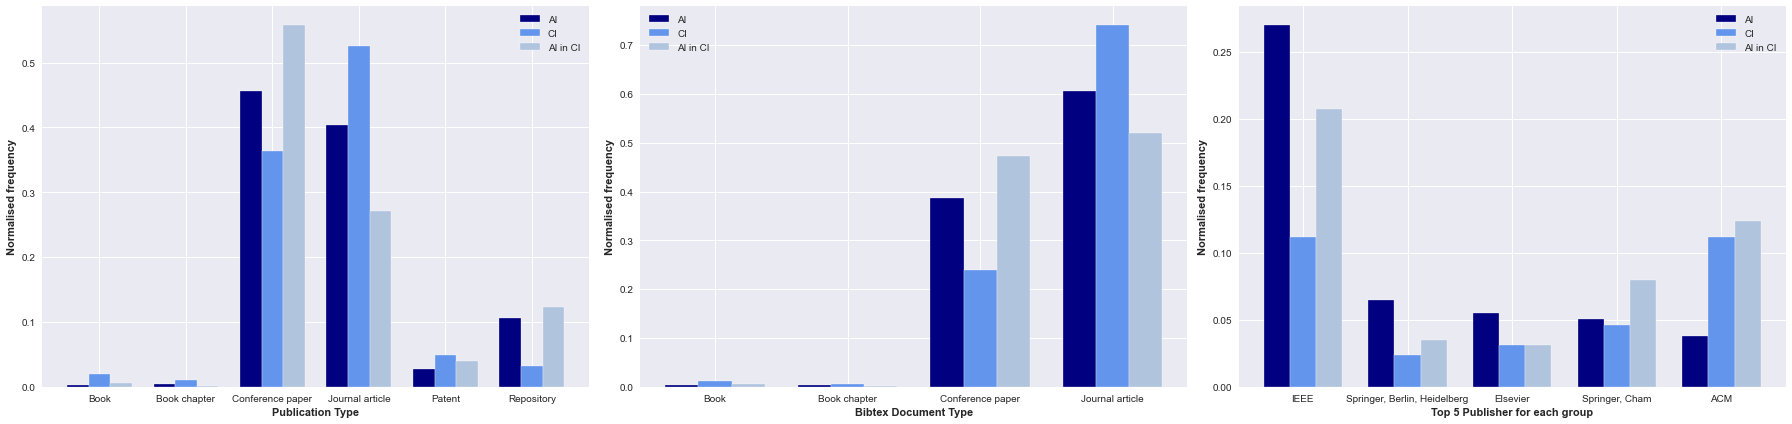

In [21]:
f = plt.figure(figsize=(25,6))
ax1 = plt.subplot2grid((1,3),(0, 0))
ax2 = plt.subplot2grid((1,3),(0, 1))
ax3 = plt.subplot2grid((1,3),(0, 2))


# ax1
multiple_bar_plt(mag, 'publication_type', 'Publication Type', ax1)

# ax2
multiple_bar_plt(mag, 'bibtex_doc_type', 'Bibtex Document Type', ax2)

# ax3
# set width of bar
barWidth = 0.25

# Set position of bar on X axis
r1 = np.arange(len(publishers))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]

# Make the plot
ax3.bar(r1, ai_count, color='navy', width=barWidth, edgecolor='white', label='AI')
ax3.bar(r2, ci_count, color='cornflowerblue', width=barWidth, edgecolor='white', label='CI')
ax3.bar(r3, ai_ci_count, color='lightsteelblue', width=barWidth, edgecolor='white', label='AI in CI')

# Add xticks on the middle of the group bars
ax3.set_xlabel('Top 5 Publisher for each group', fontweight='bold')
ax3.set_ylabel('Normalised frequency', fontweight='bold')
ax3.set_xticks([r + barWidth for r in range(len(publishers))])
ax3.set_xticklabels(publishers)

# Create legend & Show graphic
ax3.legend()

f.tight_layout()
plt.show()

## Publication type and publisher by year per group

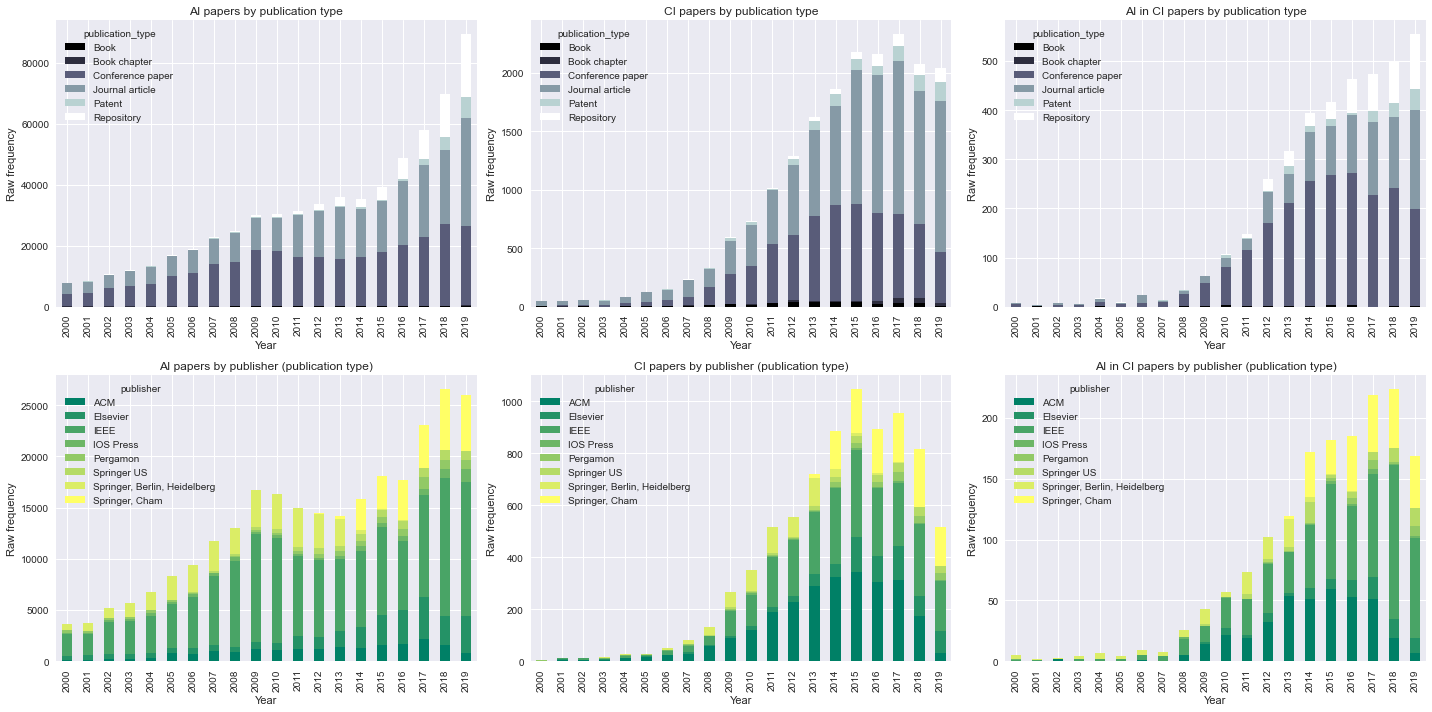

In [22]:
f = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2,3),(0, 0))
ax2 = plt.subplot2grid((2,3),(1, 0))
ax3 = plt.subplot2grid((2,3),(0, 1))
ax4 = plt.subplot2grid((2,3),(1, 1))
ax5 = plt.subplot2grid((2,3),(0, 2))
ax6 = plt.subplot2grid((2,3),(1, 2))

# ax1
mag[mag.type=='ai'].groupby(['year', 'publication_type']).count()['id'].unstack('publication_type').plot(kind='bar', stacked=True, ax=ax1, cmap='bone')
ax1.set_title('AI papers by publication type')
ax1.set_ylabel('Raw frequency')
ax1.set_xlabel('Year')


# Find the publishers with most papers on disinfo
top_publishers = mag.publisher.value_counts()[:8].index
# ax2
pub = mag[mag.type=='ai'][mag[mag.type=='ai'].publisher.isin(top_publishers)].groupby(['year', 'publisher']).count()['id']
pub.unstack('publisher').plot(kind='bar', stacked=True, ax=ax2, cmap='summer')
ax2.set_title('AI papers by publisher (publication type)')
ax2.set_ylabel('Raw frequency')
ax2.set_xlabel('Year')



# ax3
mag[mag.type=='ci'].groupby(['year', 'publication_type']).count()['id'].unstack('publication_type').plot(kind='bar', stacked=True, ax=ax3, cmap='bone')
ax3.set_title('CI papers by publication type')
ax3.set_ylabel('Raw frequency')
ax3.set_xlabel('Year')


# Find the publishers with most papers on disinfo
# ax4
pub = mag[mag.type=='ci'][mag[mag.type=='ci'].publisher.isin(top_publishers)].groupby(['year', 'publisher']).count()['id']
pub.unstack('publisher').plot(kind='bar', stacked=True, ax=ax4, cmap='summer')
ax4.set_title('CI papers by publisher (publication type)')
ax4.set_ylabel('Raw frequency')
ax4.set_xlabel('Year')


# ax5
mag[mag.type=='ai_ci'].groupby(['year', 'publication_type']).count()['id'].unstack('publication_type').plot(kind='bar', stacked=True, ax=ax5, cmap='bone')
ax5.set_title('AI in CI papers by publication type')
ax5.set_ylabel('Raw frequency')
ax5.set_xlabel('Year')


# Find the publishers with most papers on disinfo
# ax6
pub = mag[mag.type=='ai_ci'][mag[mag.type=='ai_ci'].publisher.isin(top_publishers)].groupby(['year', 'publisher']).count()['id']
pub.unstack('publisher').plot(kind='bar', stacked=True, ax=ax6,cmap='summer')
ax6.set_title('AI in CI papers by publisher (publication type)')
ax6.set_ylabel('Raw frequency')
ax6.set_xlabel('Year')

f.tight_layout()
plt.show()

## Top 10 Journals and Conferences by year per group

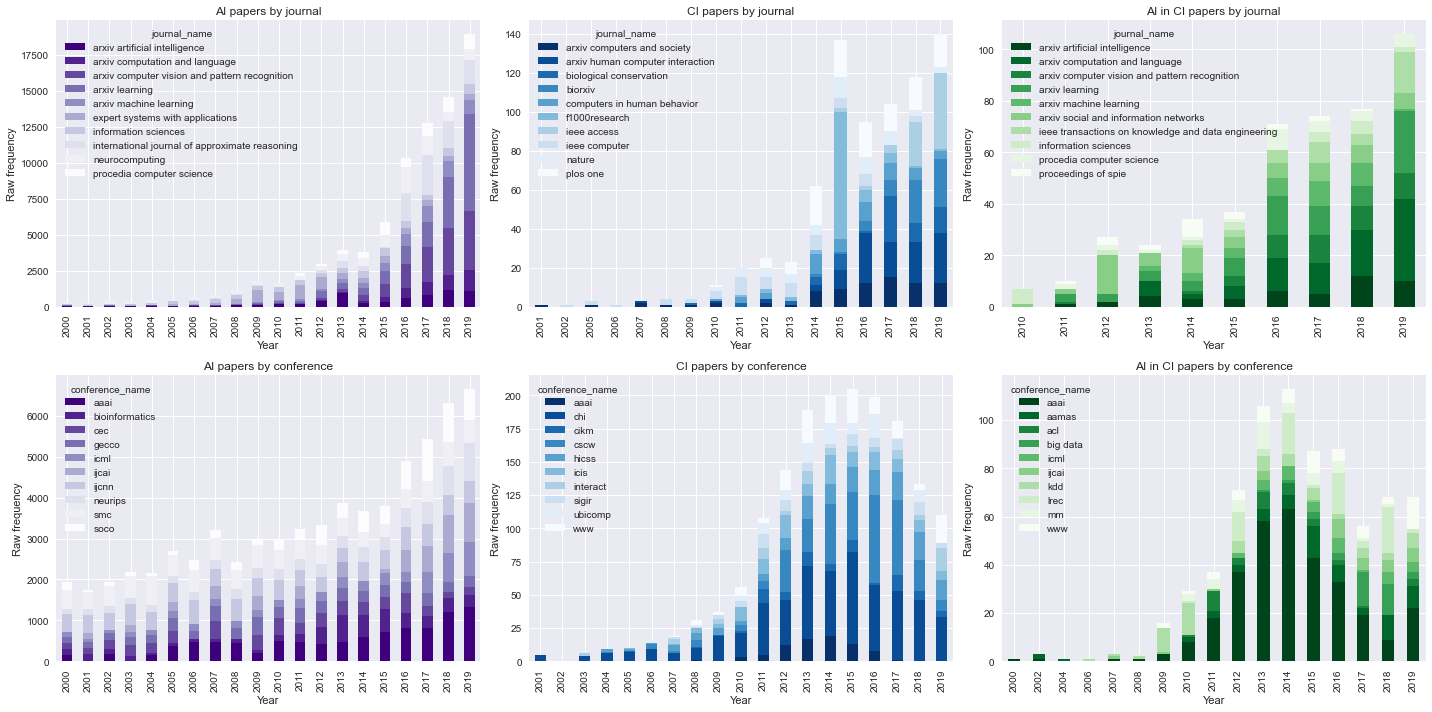

In [23]:
f = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2,3),(0, 0))
ax2 = plt.subplot2grid((2,3),(1, 0))
ax3 = plt.subplot2grid((2,3),(0, 1))
ax4 = plt.subplot2grid((2,3),(1, 1))
ax5 = plt.subplot2grid((2,3),(0, 2))
ax6 = plt.subplot2grid((2,3),(1, 2))

## AI
top_journals_ai = journal[journal.type=='ai'].journal_name.value_counts()[:10].index
top_conferences_ai = conferences[conferences.type=='ai'].conference_name.value_counts()[:10].index

journal[journal.type=='ai'][journal[journal.type=='ai'].journal_name.isin(top_journals_ai)].groupby(['year', 'journal_name'])['paper_id'].count().unstack('journal_name').plot(kind='bar', stacked=True, ax=ax1, cmap='Purples_r')
ax1.set_title('AI papers by journal')
ax1.set_ylabel('Raw frequency')
ax1.set_xlabel('Year')

conferences[conferences.type=='ai'][conferences[conferences.type=='ai'].conference_name.isin(top_conferences_ai)].groupby(['year', 'conference_name'])['paper_id'].count().unstack('conference_name').plot(kind='bar', stacked=True, ax=ax2, cmap='Purples_r')
ax2.set_title('AI papers by conference')
ax2.set_ylabel('Raw frequency')
ax2.set_xlabel('Year')

## CI
top_journals_ci = journal[journal.type=='ci'].journal_name.value_counts()[:10].index
top_conferences_ci = conferences[conferences.type=='ci'].conference_name.value_counts()[:10].index

journal[journal.type=='ci'][journal[journal.type=='ci'].journal_name.isin(top_journals_ci)].groupby(['year', 'journal_name'])['paper_id'].count().unstack('journal_name').plot(kind='bar', stacked=True, ax=ax3, cmap='Blues_r')
ax3.set_title('CI papers by journal')
ax3.set_ylabel('Raw frequency')
ax3.set_xlabel('Year')

conferences[conferences.type=='ci'][conferences[conferences.type=='ci'].conference_name.isin(top_conferences_ci)].groupby(['year', 'conference_name'])['paper_id'].count().unstack('conference_name').plot(kind='bar', stacked=True, ax=ax4, cmap='Blues_r')
ax4.set_title('CI papers by conference')
ax4.set_ylabel('Raw frequency')
ax4.set_xlabel('Year')

## AI in CI
top_journals_ai_ci = journal[journal.type=='ai_ci'].journal_name.value_counts()[:10].index
top_conferences_ai_ci = conferences[conferences.type=='ai_ci'].conference_name.value_counts()[:10].index

journal[journal.type=='ai_ci'][journal[journal.type=='ai_ci'].journal_name.isin(top_journals_ai_ci)].groupby(['year', 'journal_name'])['paper_id'].count().unstack('journal_name').plot(kind='bar', stacked=True, ax=ax5, cmap='Greens_r')
ax5.set_title('AI in CI papers by journal')
ax5.set_ylabel('Raw frequency')
ax5.set_xlabel('Year')

conferences[conferences.type=='ai_ci'][conferences[conferences.type=='ai_ci'].conference_name.isin(top_conferences_ai_ci)].groupby(['year', 'conference_name'])['paper_id'].count().unstack('conference_name').plot(kind='bar', stacked=True, ax=ax6, cmap='Greens_r')
ax6.set_title('AI in CI papers by conference')
ax6.set_ylabel('Raw frequency')
ax6.set_xlabel('Year')

f.tight_layout()
plt.show()

In [24]:
mag['avg_citations'] = [row['citations'] / (2020 - int(row['year'])) for _, row in mag.iterrows()]

## Paper citations by group and average paper citations by group

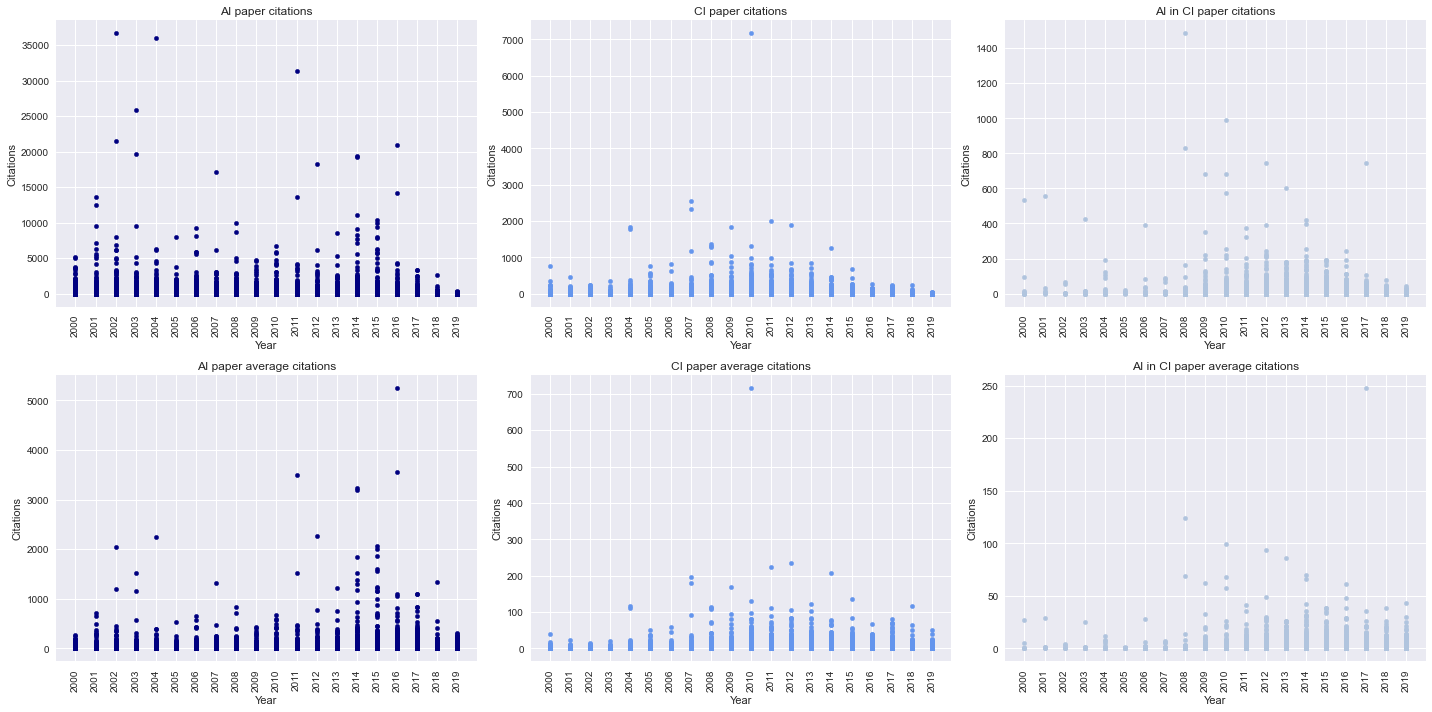

In [25]:
f = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((2,3),(0, 0))
ax2 = plt.subplot2grid((2,3),(0, 1))
ax3 = plt.subplot2grid((2,3),(0, 2))
ax4 = plt.subplot2grid((2,3),(1, 0))
ax5 = plt.subplot2grid((2,3),(1, 1))
ax6 = plt.subplot2grid((2,3),(1, 2))

# ax1
citations_ai = mag[mag.type=='ai'][['citations', 'year']]
citations_ai['year'] = citations_ai.year.apply(lambda x: int(x))
citations_ai.plot(kind='scatter', x='year', y='citations', rot=90, ax=ax1, color='navy')
ax1.set_title('AI paper citations')
ax1.set_ylabel('Citations')
ax1.set_xlabel('Year')
ax1.set_xticks([int(i) for i in sorted(mag[mag.type=='ai'].year.unique())])
ax1.set_xticklabels(sorted(mag[mag.type=='ai'].year.unique()))

citations_ci = mag[mag.type=='ci'][['citations', 'year']]
citations_ci['year'] = citations_ci.year.apply(lambda x: int(x))
citations_ci.plot(kind='scatter', x='year', y='citations', rot=90, ax=ax2, color='cornflowerblue')
ax2.set_title('CI paper citations')
ax2.set_ylabel('Citations')
ax2.set_xlabel('Year')
ax2.set_xticks([int(i) for i in sorted(mag[mag.type=='ai'].year.unique())])
ax2.set_xticklabels(sorted(mag[mag.type=='ai'].year.unique()))

citations_ai_ci = mag[mag.type=='ai_ci'][['citations', 'year']]
citations_ai_ci['year'] = citations_ai_ci.year.apply(lambda x: int(x))
citations_ai_ci.plot(kind='scatter', x='year', y='citations', rot=90, ax=ax3, color='lightsteelblue')
ax3.set_title('AI in CI paper citations')
ax3.set_ylabel('Citations')
ax3.set_xlabel('Year')
ax3.set_xticks([int(i) for i in sorted(mag.year.unique())])
ax3.set_xticklabels(sorted(mag.year.unique()))


# ax2
avg_citations_ai = mag[mag.type=='ai'][['avg_citations', 'year']]
avg_citations_ai['year'] = avg_citations_ai.year.apply(lambda x: int(x))
avg_citations_ai.plot(kind='scatter', x='year', y='avg_citations', rot=90, ax=ax4, color='navy')
ax4.set_title('AI paper average citations')
ax4.set_ylabel('Citations')
ax4.set_xlabel('Year')
ax4.set_xticks([int(i) for i in sorted(mag[mag.type=='ai'].year.unique())])
ax4.set_xticklabels(sorted(mag[mag.type=='ai'].year.unique()))

avg_citations_ci = mag[mag.type=='ci'][['avg_citations', 'year']]
avg_citations_ci['year'] = avg_citations_ci.year.apply(lambda x: int(x))
avg_citations_ci.plot(kind='scatter', x='year', y='avg_citations', rot=90, ax=ax5, color='cornflowerblue')
ax5.set_title('CI paper average citations')
ax5.set_ylabel('Citations')
ax5.set_xlabel('Year')
ax5.set_xticks([int(i) for i in sorted(mag[mag.type=='ai'].year.unique())])
ax5.set_xticklabels(sorted(mag[mag.type=='ai'].year.unique()))

avg_citations_ai_ci = mag[mag.type=='ai_ci'][['avg_citations', 'year']]
avg_citations_ai_ci['year'] = avg_citations_ai_ci.year.apply(lambda x: int(x))
avg_citations_ai_ci.plot(kind='scatter', x='year', y='avg_citations', rot=90, ax=ax6, color='lightsteelblue')
ax6.set_title('AI in CI paper average citations')
ax6.set_ylabel('Citations')
ax6.set_xlabel('Year')
ax6.set_xticks([int(i) for i in sorted(mag.year.unique())])
ax6.set_xticklabels(sorted(mag.year.unique()))

f.tight_layout()
plt.show()

## References

In [26]:
unique_refs_ai = set(flatten_lists(mag[mag.type=='ai'].references.dropna()))
unique_refs_ci = set(flatten_lists(mag[mag.type=='ci'].references.dropna()))
unique_refs_ai_ci = set(flatten_lists(mag[mag.type=='ai_ci'].references.dropna()))

In [27]:
print(f"% of AI papers in references: {(mag[mag.type=='ai'].id.unique().shape[0] / len(unique_refs_ai)) * 100}")
print(f"% of CI papers in references: {(mag[mag.type=='ci'].id.unique().shape[0] / len(unique_refs_ci)) * 100}")
print(f"% of AI in CI papers in references: {(mag[mag.type=='ai_ci'].id.unique().shape[0] / len(unique_refs_ai_ci)) * 100}")

% of AI papers in references: 5321028.571428572
% of CI papers in references: 232135.71428571426
% of AI in CI papers in references: 32814.28571428572


## Authors

In [28]:
authors = pd.read_csv('../../data/interim/authors.csv', index_col=0)
paper_authors = pd.read_csv('../../data/interim/paper_authors.csv', index_col=0)

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [29]:
print(f"Average number of co-authors in AI papers: {paper_authors[paper_authors.type=='ai'].groupby('paper_id').count()['author_id'].mean()}")
print(f"Average number of co-authors in CI papers: {paper_authors[paper_authors.type=='ci'].groupby('paper_id').count()['author_id'].mean()}")
print(f"Average number of co-authors in AI in CI papers: {paper_authors[paper_authors.type=='ai_ci'].groupby('paper_id').count()['author_id'].mean()}")

Average number of co-authors in AI papers: 3.0964542301166262
Average number of co-authors in CI papers: 3.03990892027447
Average number of co-authors in AI in CI papers: 3.478667827601219


In [30]:
names_ai = [paper_authors[paper_authors.type=='ai'].groupby(['author_id','name']).count().sort_values('paper_id', ascending=False).head(10).paper_id.index[i][1] for i in range(10)]

In [31]:
names_ci = [paper_authors[paper_authors.type=='ci'].groupby(['author_id','name']).count().sort_values('paper_id', ascending=False).head(10).paper_id.index[i][1] for i in range(10)]

In [32]:
names_ai_ci = [paper_authors[paper_authors.type=='ai_ci'].groupby(['author_id','name']).count().sort_values('paper_id', ascending=False).head(10).paper_id.index[i][1] for i in range(10)]

In [33]:
list(paper_authors[paper_authors.type=='ai'].groupby(['author_id','name']).count().sort_values('paper_id', ascending=False).head(10).paper_id)

[647, 554, 552, 529, 508, 409, 399, 392, 376, 370]

In [34]:
affiliations = pd.read_csv('../../data/interim/affiliations.csv', index_col=0)
author_aff = pd.read_csv('../../data/interim/author_aff.csv', index_col=0)
location = pd.read_csv('../../data/interim/location.csv', index_col=0)

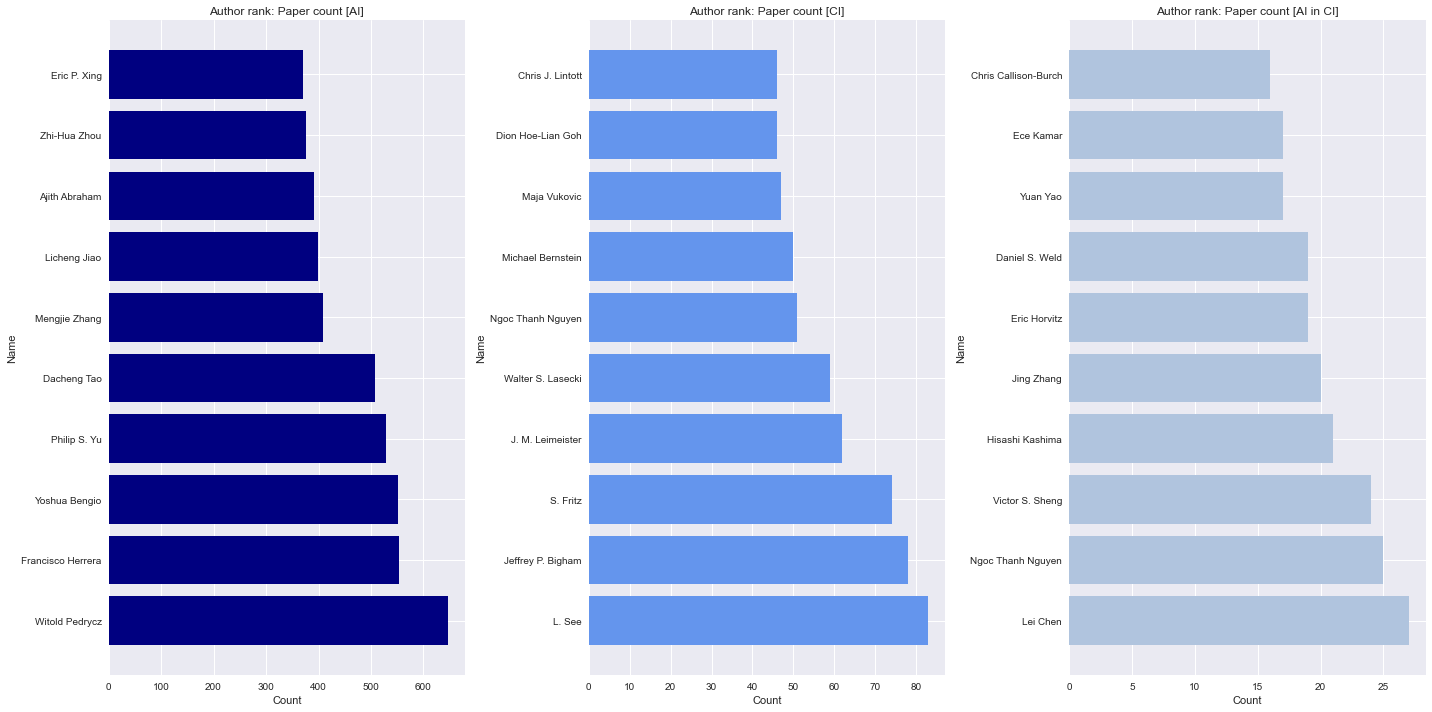

In [35]:
f = plt.figure(figsize=(20,10))
ax1 = plt.subplot2grid((1,3),(0, 0))
ax2 = plt.subplot2grid((1,3),(0, 1))
ax3 = plt.subplot2grid((1,3),(0, 2))
ax1.barh(names_ai, list(paper_authors[paper_authors.type=='ai'].groupby(['author_id','name']).count().sort_values('paper_id', ascending=False).head(10).paper_id), color='navy')
ax2.barh(names_ci,list(paper_authors[paper_authors.type=='ci'].groupby(['author_id','name']).count().sort_values('paper_id', ascending=False).head(10).paper_id), color='cornflowerblue')
ax3.barh(names_ai_ci, list(paper_authors[paper_authors.type=='ai_ci'].groupby(['author_id','name']).count().sort_values('paper_id', ascending=False).head(10).paper_id), color='lightsteelblue')
ax1.set_title('Author rank: Paper count [AI]')
ax1.set_ylabel('Name')
ax1.set_xlabel('Count')
ax2.set_title('Author rank: Paper count [CI]')
ax2.set_ylabel('Name')
ax2.set_xlabel('Count')
ax3.set_title('Author rank: Paper count [AI in CI]')
ax3.set_ylabel('Name')
ax3.set_xlabel('Count')


f.tight_layout()
plt.show()

## Geography of research

In [36]:
author_aff.groupby('author_id').count()['affiliation_id'].sort_values(ascending=False)[:5]

author_id
136859070     728
2141382980    527
2125104194    450
2104129307    420
2097529606    380
Name: affiliation_id, dtype: int64

In [37]:
print(f'Unique author affiliations: {affiliations.shape[0]}')
print(f'% of geocoded affiliations: {(location.shape[0] / affiliations.shape[0]) * 100}')

Unique author affiliations: 10637
% of geocoded affiliations: 94.61314280342201


In [429]:
references = pd.read_csv('../../data/interim/references.csv')

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [202]:
smj_ai = pd.read_csv("../../data/interim/scimagojr_2018_ai_only.csv", index_col=0)

In [365]:
df = paper_authors.merge(author_aff, on=('paper_id', 'author_id')).merge(location, on='affiliation_id')

In [366]:
df = df.rename(columns={'name_x' : 'name', 'name_y' : 'institution'})

In [367]:
# Add the publication year
df = df.merge(mag[['id', 'year', 'citations']], left_on='paper_id', right_on='id')

In [368]:
df = df.merge(journal[['paper_id','journal_name','Rank']], on='paper_id')

In [369]:
df = df.drop(columns={'id_y','year_y'})

In [370]:
df = df.rename(columns={'year_x' : 'year'})

In [371]:
df_rank_sorted = df[df.Rank != 'arxiv'].sort_values(by='Rank').reset_index().drop(columns="index")

In [372]:
df_rank_sorted.head()

,paper_id,author_id,order,year,type,name,affiliation_id,id_x,lat,lng,...,institution,types,website,postal_town,administrative_area_level_2,administrative_area_level_1,country,citations,journal_name,Rank
0,2788633781,2297502671,37,2018,ai,M. Anthony Lewis,19268510.0,ChIJqR6CYQsOdkgR_KwlS8cNnuE,51.495482,-0.276831,...,Qualcomm Europe Inc,"{point_of_interest,establishment}",http://www.qualcomm.com/,London,Greater London,England,United Kingdom,287,cell,10
1,2995153909,1912404580,24,2019,ai,Boyan K. Garvalov,200763008.0,ChIJZW0NaetYvEcRwdVpH8bt-kg,50.580467,8.677140,...,University of Giessen,"{university,point_of_interest,establishment}",http://www.uni-giessen.de/index.html,NaN,Gießen,Hessen,Germany,2,cell,10
2,2995153909,2575264379,11,2019,ai,Christian Veltkamp,17937529.0,ChIJxe8fCC_Bl0cRyDi01eCAwCE,49.414414,8.672961,...,German Cancer Research Center,"{point_of_interest,establishment}",https://www.dkfz.de/,NaN,Karlsruhe,Baden-Württemberg,Germany,2,cell,10
3,2995153909,2138787547,21,2019,ai,Dieter Saur,17937529.0,ChIJxe8fCC_Bl0cRyDi01eCAwCE,49.414414,8.672961,...,German Cancer Research Center,"{point_of_interest,establishment}",https://www.dkfz.de/,NaN,Karlsruhe,Baden-Württemberg,Germany,2,cell,10
4,2995153909,2995060103,10,2019,ai,Katia Sleiman,17937529.0,ChIJxe8fCC_Bl0cRyDi01eCAwCE,49.414414,8.672961,...,German Cancer Research Center,"{point_of_interest,establishment}",https://www.dkfz.de/,NaN,Karlsruhe,Baden-Württemberg,Germany,2,cell,10


In [377]:
references = references[references.order == 1]

In [399]:
references['references_institutions'] = np.zeros(len(references))
references['references_countries'] = np.zeros(len(references))

In [415]:
references['references_institutions'] = references['references_institutions'].astype('object')
references['references_countries'] = references['references_countries'].astype('object')

start from 12082

In [424]:
#for index, bibliography in references.references.iteritems():
#    institutions = []
#    countries = []
#    if type(bibliography) != float:
#        for reference in bibliography:
#            if len(references[references.paper_id == reference]) > 0:
#                institutions.append(references.institution[references.paper_id == reference])
#                countries.append(references.country[references.paper_id == reference])
#        references['references_institutions'][index] = institutions
#        references['references_countries'][index] = countries
##    else:
#        references['references_institutions'][index] = np.nan
#        references['references_countries'][index] = np.nan

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/core/ops/array_ops.py:253: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  res_values = method(rvalues)
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users

KeyboardInterrupt: 

In [428]:
references[references.references_institutions != 0]

,paper_id,author_id,order,year,type,name,affiliation_id,id_x,lat,lng,...,postal_town,administrative_area_level_2,administrative_area_level_1,country,citations,references,journal_name,Rank,references_institutions,references_countries
0,2028901205,157591724,1,2000,ai,Larry D. Pyeatt,1.231556e+07,ChIJR8ge8xPEQIYRSXiwt3SzLQU,33.584259,-101.878282,...,NaN,Lubbock County,Texas,United States,0,"[2100677568, 73143588, 2115356364, 1979071892,...",journal of experimental and theoretical artifi...,11495,[],[]
1,2103535498,2230105407,1,2014,ai,Brett L. Moore,1.231556e+07,ChIJR8ge8xPEQIYRSXiwt3SzLQU,33.584259,-101.878282,...,NaN,Lubbock County,Texas,United States,18,"[2912565176, 2122410182, 2121863487, 151585119...",journal of machine learning research,2466,[],[]
2,1978815455,260560690,1,2005,ai,Eric D. Sinzinger,1.231556e+07,ChIJR8ge8xPEQIYRSXiwt3SzLQU,33.584259,-101.878282,...,NaN,Lubbock County,Texas,United States,3,"[2038746872, 2322707526, 2115473091, 209874518...",international journal on artificial intelligen...,15152,[],[]
3,2323504902,2857306099,1,2017,ai,Chao Wang,1.265200e+08,ChIJh-pt2ExhyzURzp1P4yp5XKw,31.837937,117.266767,...,NaN,NaN,NaN,China,3,"[2173213060, 1970156673, 2152839228, 215687567...",ieee acm transactions on computational biology...,NaN,[],[]
4,2135624041,2108321102,1,2010,ai,Mohan Sridharan,1.231556e+07,ChIJR8ge8xPEQIYRSXiwt3SzLQU,33.584259,-101.878282,...,NaN,Lubbock County,Texas,United States,40,"[2151103935, 2122410182, 2128272608, 199947815...",artificial intelligence,4321,[],[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12078,2891352015,2565394798,1,2019,ai,Alborz Rezazadeh Sereshkeh,1.852618e+08,ChIJm_0x87g0K4gR93ZadrabHY0,43.662892,-79.395656,...,NaN,Toronto Division,Ontario,Canada,4,"[2075647286, 2128909182, 2168217710, 201037140...",journal of neural engineering,1916,[],[]
12079,2891352015,2565394798,1,2019,ai,Alborz Rezazadeh Sereshkeh,2.801421e+09,ChIJg35SRynN1IkRt0XKvjYFkts,43.718057,-79.374180,...,NaN,Toronto Division,Ontario,Canada,4,"[2075647286, 2128909182, 2168217710, 201037140...",journal of neural engineering,1916,[],[]
12080,2533374725,2563439305,1,2016,ai,Elias Abou Zeid,1.852618e+08,ChIJm_0x87g0K4gR93ZadrabHY0,43.662892,-79.395656,...,NaN,Toronto Division,Ontario,Canada,2,"[2116308679, 2128909182, 2152171700, 215391211...",journal of neural engineering,1916,[],[]
12081,2533374725,2563439305,1,2016,ai,Elias Abou Zeid,2.801421e+09,ChIJg35SRynN1IkRt0XKvjYFkts,43.718057,-79.374180,...,NaN,Toronto Division,Ontario,Canada,2,"[2116308679, 2128909182, 2152171700, 215391211...",journal of neural engineering,1916,[],[]


In [351]:
df_arxiv = df[(df.Rank == "arxiv")]

In [347]:
df_arxiv_country  = pd.DataFrame(df_arxiv.groupby('country').paper_id.count())
df_arxiv_institution  = pd.DataFrame(df_arxiv.groupby('institution').paper_id.count())

In [348]:
df_arxiv_country = df_arxiv_country.rename(columns={'paper_id' : 'count'})
df_arxiv_institution = df_arxiv_institution.rename(columns={'paper_id' : 'count'})

In [349]:
df_arxiv_top_50_countries = df_arxiv_country.sort_values(by='count', ascending=False)[:50]
df_arxiv_top_50_institution = df_arxiv_institution.sort_values(by='count', ascending=False)[:50]

In [350]:
df_arxiv_top_50_institution

,count
institution,
University of Washington,12
Microsoft London,9
Carnegie Mellon University,7
Allen Institute for Artificial Intelligence (AI2),6
Erasmus University Rotterdam,6
Princeton University,6
"University of California, Berkeley",5
Syracuse University,5
Ghent University,5


In [322]:
types = []
for value in df_rank_sorted.Rank:
    try:
        int(value)
        types.append(True)
    except:
        types.append(False)

In [323]:
df_rank_sorted = df_rank_sorted[types]

In [324]:
df_rank_sorted['Rank'] = pd.to_numeric(df_rank_sorted['Rank'])

In [325]:
print(f"Percentage that are published in arxiv compared to sjr journals : {len(df_arxiv)/len(df_rank_sorted)*100}")

Percentage that are published in arxiv compared to sjr journals : 8.069522036002482


In [326]:
df_rank_country  = pd.DataFrame(df_rank_sorted.groupby('country').paper_id.count())
df_rank_institution  = pd.DataFrame(df_rank_sorted.groupby('institution').paper_id.count())

In [327]:
df_rank_country = df_rank_country.rename(columns={'paper_id' : 'count'})
df_rank_institution = df_rank_institution.rename(columns={'paper_id' : 'count'})

In [328]:
df_rank_top_50_countries = df_rank_country.sort_values(by='count', ascending=False)[:50]
df_rank_top_50_institutions = df_rank_institution.sort_values(by='count', ascending=False)[:50]

In [329]:
df_rank_top_50_countries

,count
country,
China,88236
United States,73672
United Kingdom,41547
Spain,16461
India,13887
Japan,12192
Germany,11445
Canada,10640
Australia,10542


In [230]:
bins = np.linspace(0, 32000,33)

In [263]:
groups_co = df_rank_sorted.groupby(["country", pd.cut(df_rank_sorted.Rank, bins)])
groups_in = df_rank_sorted.groupby(["institution", pd.cut(df_rank_sorted.Rank, bins)])

In [264]:
df_grouped_country = groups_co.size().unstack()
df_grouped_institution = groups_in.size().unstack()

In [267]:
df_top_50_rank_0_1000_country = df_grouped_country.sort_values(by=list(df_grouped_country.columns)[0], ascending=False)[:50]
df_top_50_rank_0_1000_institution = df_grouped_institution.sort_values(by=list(df_grouped_institution.columns)[0], ascending=False)[:50]

In [335]:
df_top_50_rank_0_1000_institution

Rank,"(0.0, 1000.0]","(1000.0, 2000.0]","(2000.0, 3000.0]","(3000.0, 4000.0]","(4000.0, 5000.0]","(5000.0, 6000.0]","(6000.0, 7000.0]","(7000.0, 8000.0]","(8000.0, 9000.0]","(9000.0, 10000.0]",...,"(22000.0, 23000.0]","(23000.0, 24000.0]","(24000.0, 25000.0]","(25000.0, 26000.0]","(26000.0, 27000.0]","(27000.0, 28000.0]","(28000.0, 29000.0]","(29000.0, 30000.0]","(30000.0, 31000.0]","(31000.0, 32000.0]"
institution,,,,,,,,,,,,,,,,,,,,,
Harvard University,544,299,204,85,155,60,64,62,38,10,...,3,1,0,2,0,0,1,0,0,0
Stanford University,443,249,192,128,145,53,91,44,30,7,...,0,0,0,0,0,2,1,0,0,0
University of Oxford,366,115,109,79,120,35,64,78,14,0,...,8,2,0,1,0,0,0,0,0,0
Max Planck Institute for Psycholinguistics,335,160,229,75,323,97,83,17,31,7,...,0,0,0,0,0,0,1,0,0,0
Massachusetts Institute of Technology,331,153,194,91,170,86,117,43,41,8,...,0,0,0,1,0,0,0,0,0,0
University College London,327,234,186,99,163,48,88,48,35,40,...,1,3,0,1,5,1,0,0,0,0
University of Pennsylvania,318,204,94,56,86,49,87,25,40,12,...,0,0,0,3,0,0,0,0,0,0
Imperial College London,312,181,126,112,182,44,48,70,40,13,...,0,1,0,0,1,0,0,0,0,6
Tsinghua University,276,303,335,393,554,82,126,161,85,32,...,0,4,0,4,19,0,13,0,0,4


/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

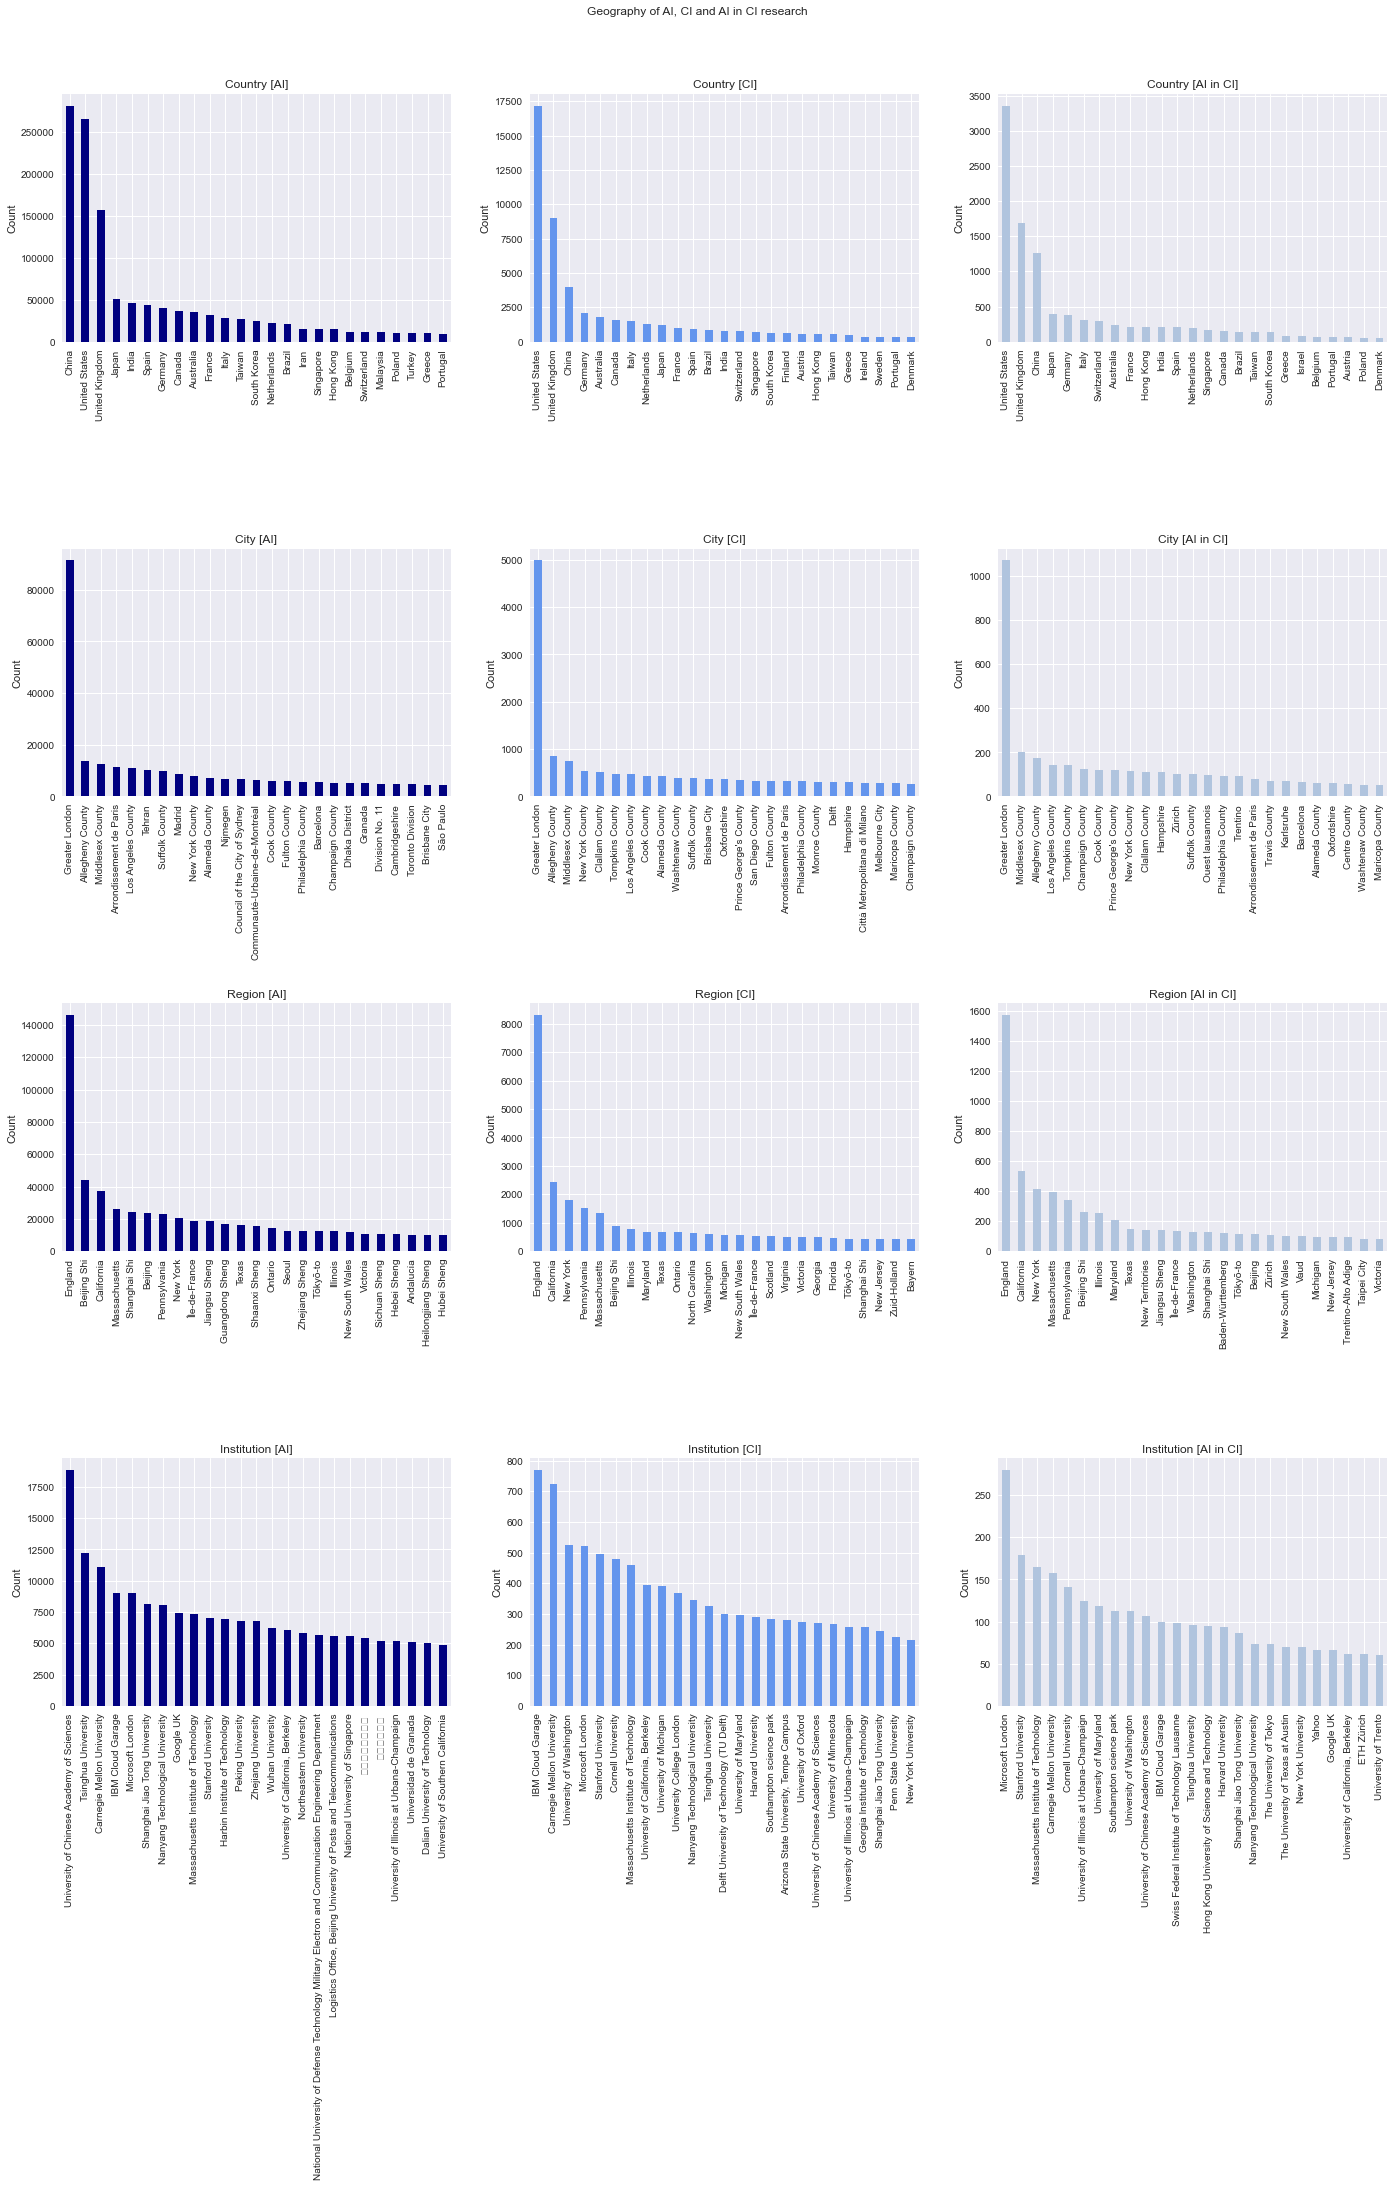

In [39]:
f = plt.figure(figsize=(20,30))
ax1 = plt.subplot2grid((4,3),(0, 0))
ax2 = plt.subplot2grid((4,3),(0, 1))
ax3 = plt.subplot2grid((4,3),(0, 2))
ax4 = plt.subplot2grid((4,3),(1, 0))
ax5 = plt.subplot2grid((4,3),(1, 1))
ax6 = plt.subplot2grid((4,3),(1, 2))
ax7 = plt.subplot2grid((4,3),(2, 0))
ax8 = plt.subplot2grid((4,3),(2, 1))
ax9 = plt.subplot2grid((4,3),(2, 2))
ax10 = plt.subplot2grid((4,3),(3, 0))
ax11= plt.subplot2grid((4,3),(3, 1))
ax12= plt.subplot2grid((4,3),(3, 2))


# ax1 AI
df[df.type=='ai'].groupby('country')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax1, color='navy')
ax1.set_title('Country [AI]')
ax1.set_ylabel('Count')
ax1.set_xlabel('')

# ax2 CI
df[df.type=='ci'].groupby('country')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax2, color='cornflowerblue')
ax2.set_title('Country [CI]')
ax2.set_ylabel('Count')
ax2.set_xlabel('')

# ax3 AI in CI
df[df.type=='ai_ci'].groupby('country')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax3, color='lightsteelblue')
ax3.set_title('Country [AI in CI]')
ax3.set_ylabel('Count')
ax3.set_xlabel('')

# ax7 AI
df[df.type=='ai'].groupby('administrative_area_level_2')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax4, color='navy')
ax4.set_title('City [AI]')
ax4.set_ylabel('Count')
ax4.set_xlabel('')

# ax8 CI
df[df.type=='ci'].groupby('administrative_area_level_2')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax5, color='cornflowerblue')
ax5.set_title('City [CI]')
ax5.set_ylabel('Count')
ax5.set_xlabel('')

# ax9 AI in CI
df[df.type=='ai_ci'].groupby('administrative_area_level_2')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax6, color='lightsteelblue')
ax6.set_title('City [AI in CI]')
ax6.set_ylabel('Count')
ax6.set_xlabel('')

# ax10 AI
df[df.type=='ai'].groupby('administrative_area_level_1')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax7, color='navy')
ax7.set_title('Region [AI]')
ax7.set_ylabel('Count')
ax7.set_xlabel('')

# ax11 CI
df[df.type=='ci'].groupby('administrative_area_level_1')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax8, color='cornflowerblue')
ax8.set_title('Region [CI]')
ax8.set_ylabel('Count')
ax8.set_xlabel('')

# ax12 CI
df[df.type=='ai_ci'].groupby('administrative_area_level_1')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax9, color='lightsteelblue')
ax9.set_title('Region [AI in CI]')
ax9.set_ylabel('Count')
ax9.set_xlabel('')


# ax4 AI
df[df.type=='ai'].groupby('institution')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax10, color='navy')
ax10.set_title('Institution [AI]')
ax10.set_ylabel('Count')
ax10.set_xlabel('')

# ax5 CI
df[df.type=='ci'].groupby('institution')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax11, color='cornflowerblue')
ax11.set_title('Institution [CI]')
ax11.set_ylabel('Count')
ax11.set_xlabel('')

# ax6 AI in CI
df[df.type=='ai_ci'].groupby('institution')['author_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax12, color='lightsteelblue')
ax12.set_title('Institution [AI in CI]')
ax12.set_ylabel('Count')
ax12.set_xlabel('')



f.suptitle('Geography of AI, CI and AI in CI research', y=1.02)
f.tight_layout(pad=3.0)
plt.show()

## Comparison between institutions

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

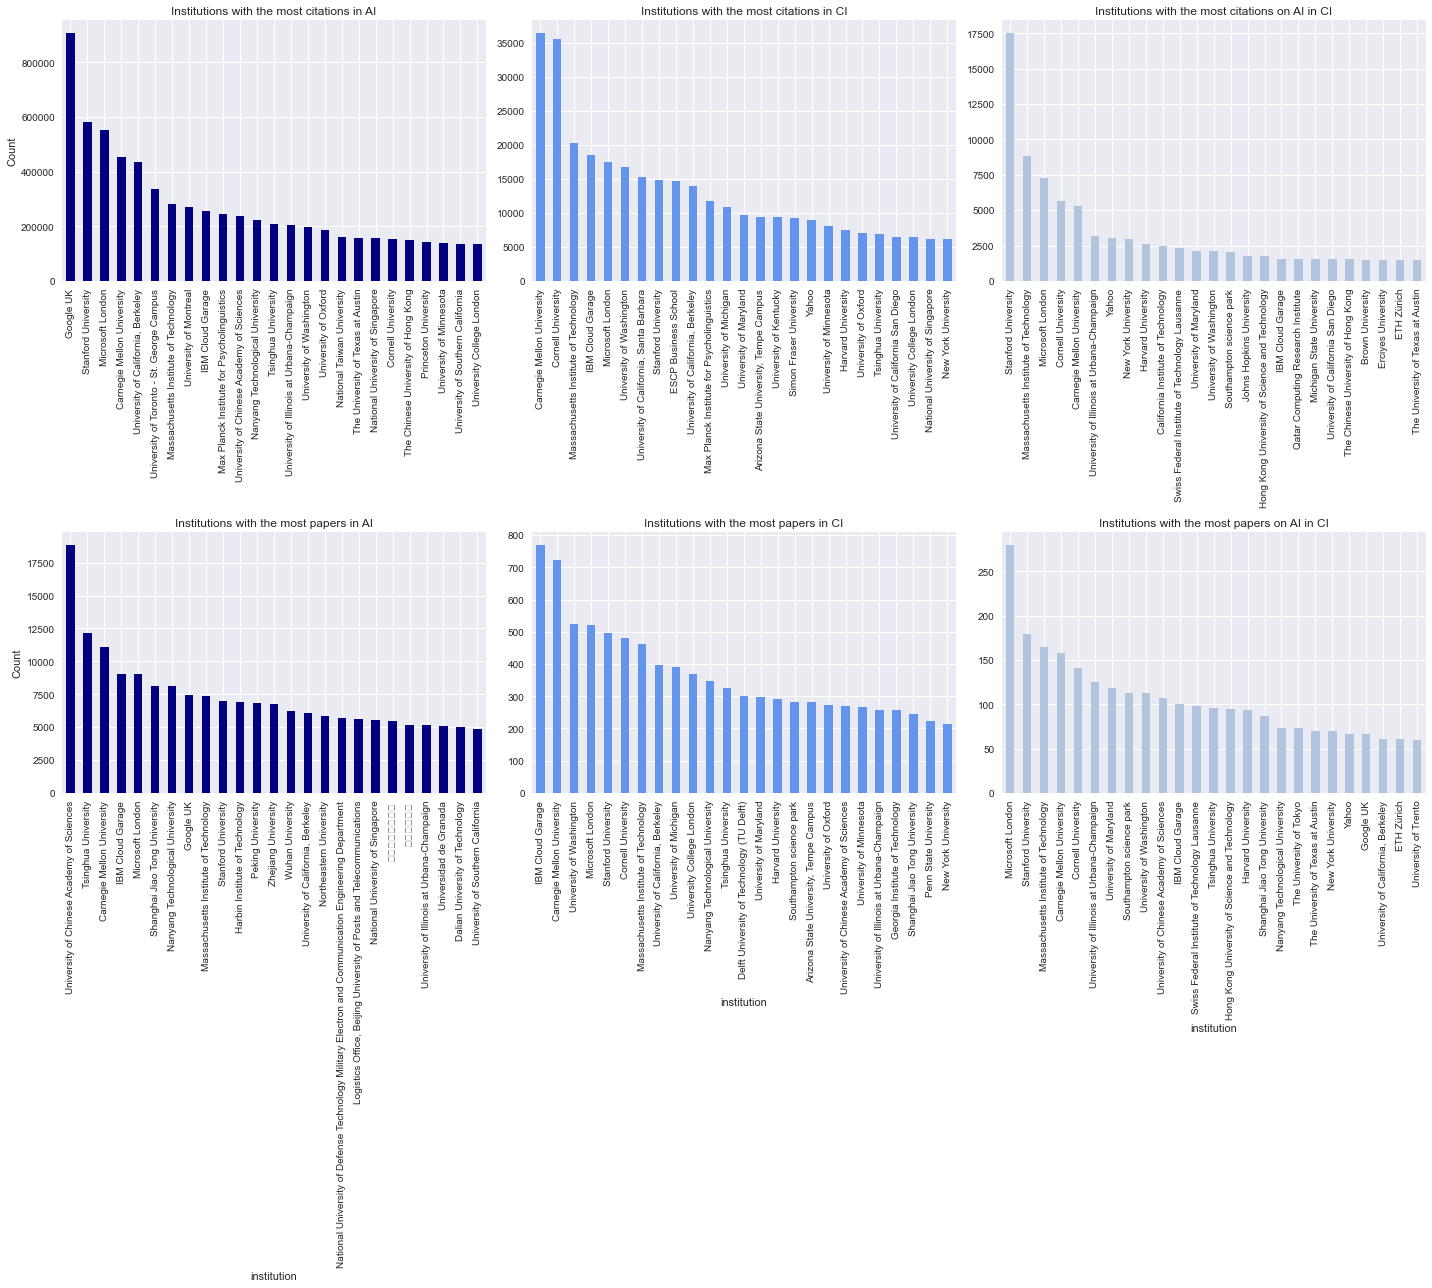

In [44]:
f = plt.figure(figsize=(20,18))
ax1 = plt.subplot2grid((2,3),(0, 0))
ax2 = plt.subplot2grid((2,3),(0, 1))
ax3 = plt.subplot2grid((2,3),(0, 2))
ax4 = plt.subplot2grid((2,3),(1, 0))
ax5 = plt.subplot2grid((2,3),(1, 1))
ax6 = plt.subplot2grid((2,3),(1, 2))

# ax1
df[df.type=='ai'].groupby('institution')['citations'].sum().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax1, color='navy')
ax1.set_title('Institutions with the most citations in AI')
ax1.set_ylabel('Count')
ax1.set_xlabel('')

# ax2
df[df.type=='ci'].groupby('institution')['citations'].sum().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax2, color='cornflowerblue')
ax2.set_title('Institutions with the most citations in CI')
ax2.set_xlabel('')

# ax3
df[df.type=='ai_ci'].groupby('institution')['citations'].sum().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax3, color='lightsteelblue')
ax3.set_title('Institutions with the most citations on AI in CI')
ax3.set_xlabel('')

# ax4
df[df.type=='ai'].groupby('institution')['paper_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax4, color='navy')
ax4.set_title('Institutions with the most papers in AI')
ax4.set_ylabel('Count')

# ax5
df[df.type=='ci'].groupby('institution')['paper_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax5, color='cornflowerblue')
ax5.set_title('Institutions with the most papers in CI')

# ax6
df[df.type=='ai_ci'].groupby('institution')['paper_id'].count().sort_values(ascending=False)[:25].plot(kind='bar', ax=ax6, color='lightsteelblue')
ax6.set_title('Institutions with the most papers on AI in CI')

f.tight_layout()
plt.show()

## Fields of Study

In [45]:
pfos = pd.read_csv('../../data/interim/pfos.csv', index_col=0)

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [46]:
pfos[pfos.type=='ci'].name.value_counts()[:50]

Crowdsourcing                         15114
Computer science                      13578
Citizen science                        6306
Knowledge management                   5277
Social computing                       5178
Collective intelligence                5154
World Wide Web                         4747
Data science                           3904
Public relations                       3550
Engineering                            3484
Social network                         3403
Political science                      3140
Sociology                              2676
Social media                           2624
The Internet                           2190
Multimedia                             2082
Human–computer interaction             1937
Data mining                            1861
Business                               1810
Internet privacy                       1791
Psychology                             1731
Geography                              1412
Biology                         

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:298: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/pandas/plotting/_matplotlib/tools.py:304: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1,

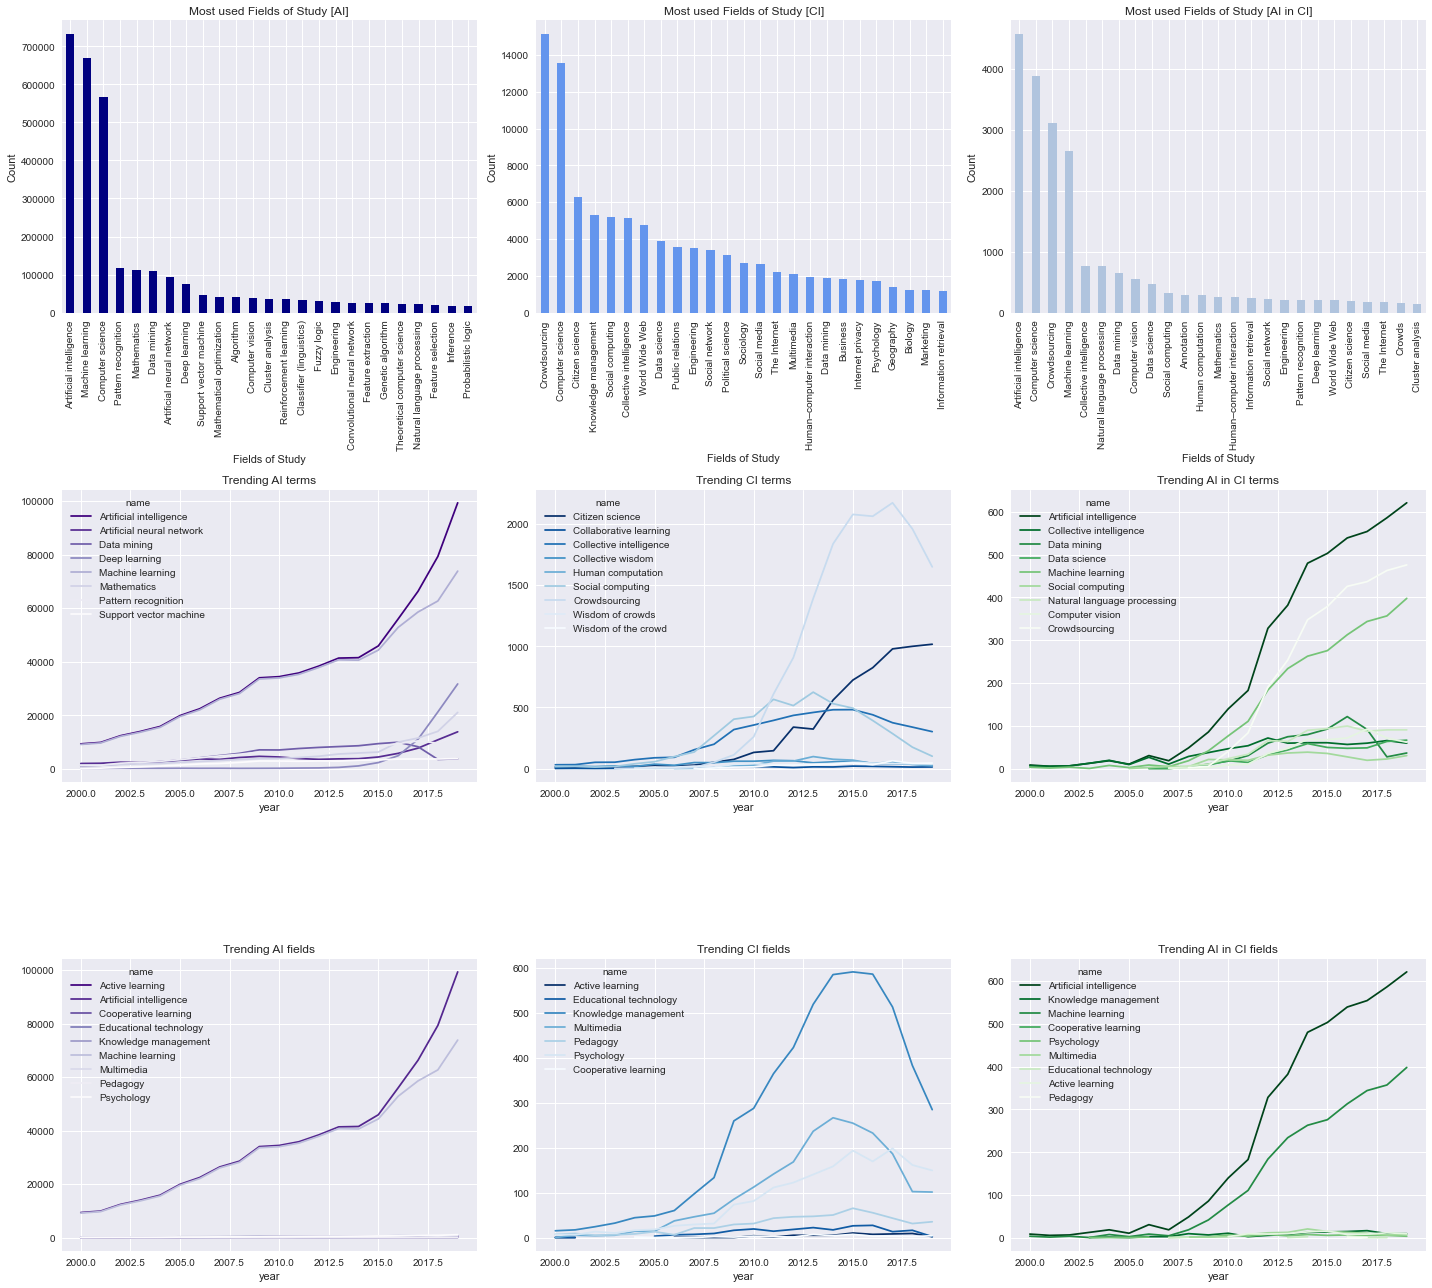

In [47]:
f = plt.figure(figsize=(20,18))
ax1 = plt.subplot2grid((3,3),(0, 0))
ax2 = plt.subplot2grid((3,3),(0, 1))
ax3 = plt.subplot2grid((3,3),(0, 2))
ax4 = plt.subplot2grid((3,3),(1, 0))
ax5 = plt.subplot2grid((3,3),(1, 1))
ax6 = plt.subplot2grid((3,3),(1, 2))
ax7 = plt.subplot2grid((3,3),(2, 0))
ax8 = plt.subplot2grid((3,3),(2, 1))
ax9 = plt.subplot2grid((3,3),(2, 2))

# ax1
pfos[pfos.type=='ai'].name.value_counts()[:25].plot(kind='bar', ax=ax1, color='navy')
ax1.set_title('Most used Fields of Study [AI]')
ax1.set_ylabel('Count')
ax1.set_xlabel('Fields of Study')

# ax2
pfos[pfos.type=='ci'].name.value_counts()[:25].plot(kind='bar', ax=ax2, color='cornflowerblue')
ax2.set_title('Most used Fields of Study [CI]')
ax2.set_ylabel('Count')
ax2.set_xlabel('Fields of Study')

# ax3
pfos[pfos.type=='ai_ci'].name.value_counts()[:25].plot(kind='bar', ax=ax3, color='lightsteelblue')
ax3.set_title('Most used Fields of Study [AI in CI]')
ax3.set_ylabel('Count')
ax3.set_xlabel('Fields of Study')

# ax4
i = pd.IndexSlice
query_terms = ["Artificial intelligence", "Machine learning", "Pattern recognition", "Mathematics", "Data mining", 
               "Artificial neural network", "Deep learning", "Support vector machine", "Mathematical optimisation"]
pfos[pfos.type == 'ai'].groupby(['year', 'name'])['paper_id'].count().loc[i[:, query_terms]].unstack('name').plot(ax=ax4, cmap='Purples_r')
ax4.set_title('Trending AI terms')
     
# ax5
i = pd.IndexSlice
query_terms = ["Crowdsourcing", "Citizen science", "Collective intelligence", "Wisdom of crowds", "Collective wisdom", 
               "Wisdom of the crowd", "Social computing", "Human computation", "Collaborative learning"]
pfos[pfos.type=='ci'].groupby(['year', 'name'])['paper_id'].count().loc[i[:, query_terms]].unstack('name').plot(ax=ax5, cmap='Blues_r')
ax5.set_title('Trending CI terms')

# ax6
i = pd.IndexSlice
query_terms = ["Artificial intelligence", "Crowdsourcing", "Machine learning", "Collective intelligence", "Natural language processing", 
               "Data mining", "Computer vision", "Data science", "Social computing"]
pfos[pfos.type=='ai_ci'].groupby(['year', 'name'])['paper_id'].count().loc[i[:, query_terms]].unstack('name').plot(ax=ax6, cmap='Greens_r')
ax6.set_title('Trending AI in CI terms')

# ax7
i = pd.IndexSlice
query_terms = ['Knowledge management', 'Psychology', 'Multimedia', 'Educational technology', 
               'Cooperative learning', 'Artificial intelligence', 'Machine learning', 'Active learning', 'Pedagogy']
pfos[pfos.type=='ai'].groupby(['year', 'name'])['paper_id'].count().loc[i[:, query_terms]].unstack('name').plot(ax=ax7, cmap='Purples_r')
ax7.set_title('Trending AI fields')
     
# ax8
i = pd.IndexSlice
query_terms = ['Knowledge management', 'Psychology', 'Multimedia', 'Educational technology', 
               'Cooperative learning', 'Artificial intelligence', 'Machine learning', 'Active learning', 'Pedagogy']
pfos[pfos.type=='ci'].groupby(['year', 'name'])['paper_id'].count().loc[i[:, query_terms]].unstack('name').plot(ax=ax8, cmap='Blues_r')
ax8.set_title('Trending CI fields')
     
     
# ax9
i = pd.IndexSlice
query_terms = ['Knowledge management', 'Psychology', 'Multimedia', 'Educational technology', 
               'Cooperative learning', 'Artificial intelligence', 'Machine learning', 'Active learning', 'Pedagogy']
pfos[pfos.type=='ai_ci'].groupby(['year', 'name'])['paper_id'].count().loc[i[:, query_terms]].unstack('name').plot(ax=ax9, cmap='Greens_r')
ax9.set_title('Trending AI in CI fields')


f.tight_layout()
plt.show()

In [48]:
pfos_geo = pd.read_csv('../../data/interim/pfos_geo.csv', index_col=0)

/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


/Users/rwilcock/opt/anaconda3/envs/ai_ci/lib/python3.6/site-packages/ipykernel_launcher.py:67: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

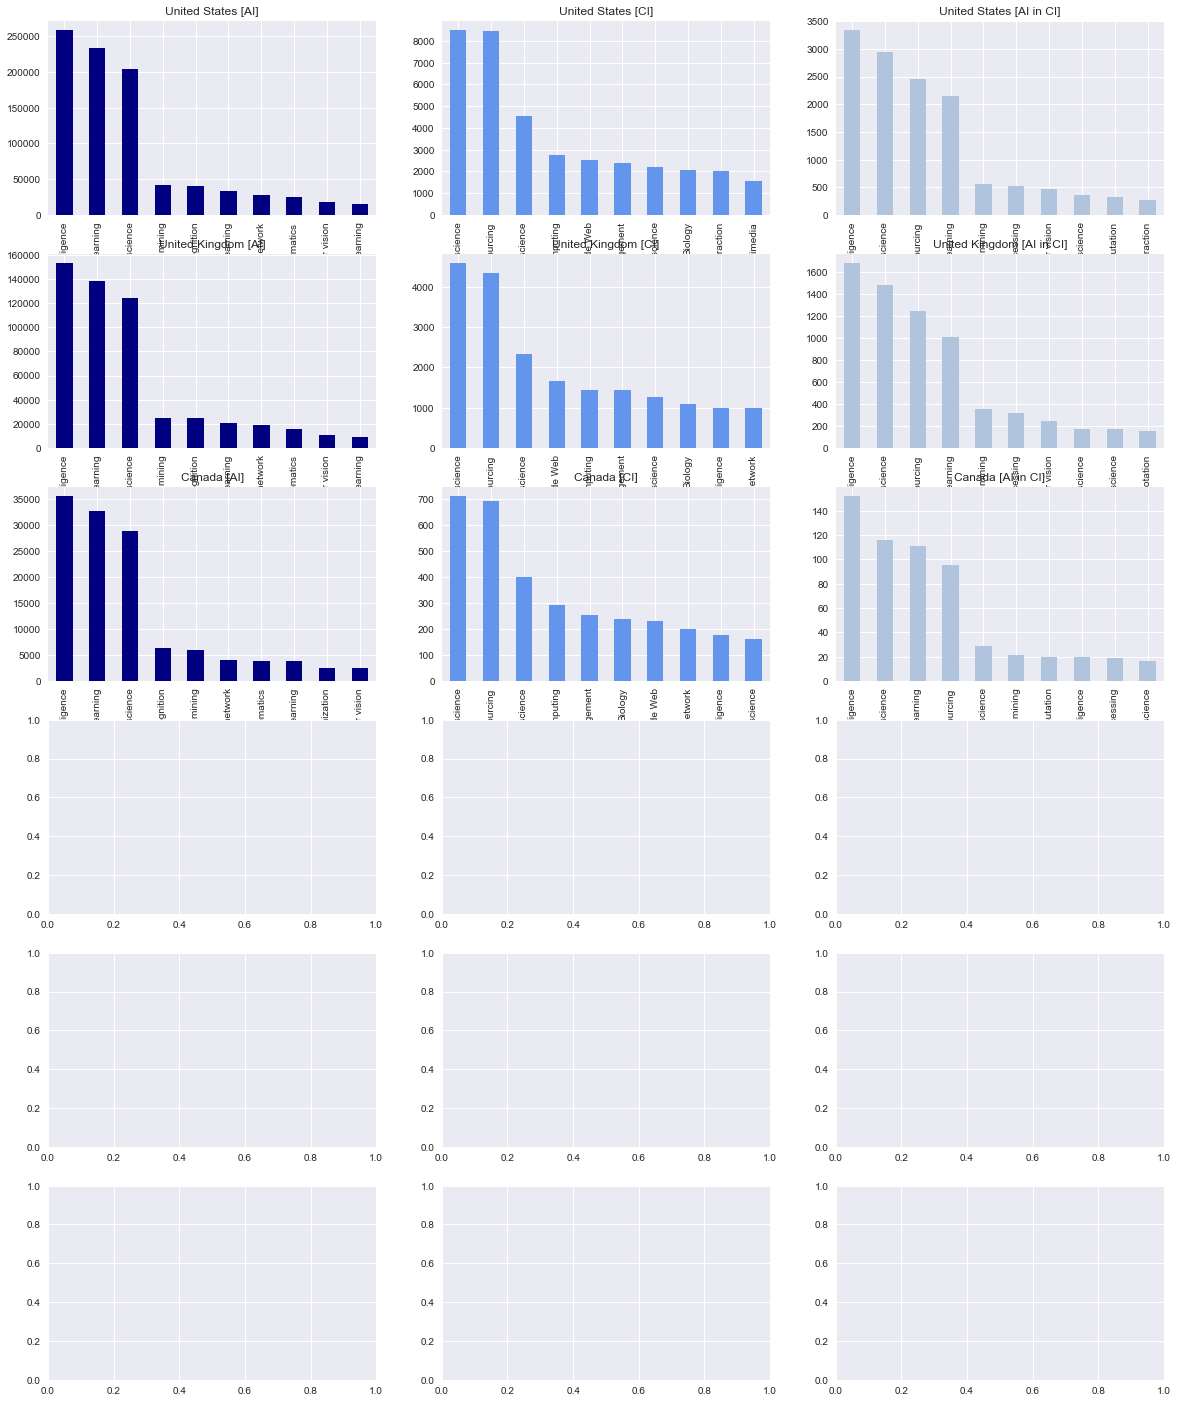

In [49]:
f = plt.figure(figsize=(20,25))
ax1 = plt.subplot2grid((6,3),(0, 0))
ax2 = plt.subplot2grid((6,3),(0, 1))
ax3 = plt.subplot2grid((6,3),(0, 2))
ax4 = plt.subplot2grid((6,3),(1, 0))
ax5 = plt.subplot2grid((6,3),(1, 1))
ax6 = plt.subplot2grid((6,3),(1, 2))
ax7 = plt.subplot2grid((6,3),(2, 0))
ax8 = plt.subplot2grid((6,3),(2, 1))
ax9 = plt.subplot2grid((6,3),(2, 2))
ax10 = plt.subplot2grid((6,3),(3, 0))
ax11 = plt.subplot2grid((6,3),(3, 1))
ax12 = plt.subplot2grid((6,3),(3, 2))
ax13 = plt.subplot2grid((6,3),(4, 0))
ax14 = plt.subplot2grid((6,3),(4, 1))
ax15 = plt.subplot2grid((6,3),(4, 2))
ax16 = plt.subplot2grid((6,3),(5, 0))
ax17 = plt.subplot2grid((6,3),(5, 1))
ax18 = plt.subplot2grid((6,3),(5, 2))

# ax1
pfos_geo[pfos_geo.type == 'ai'].groupby(['country', 'name'])['paper_id'].count().loc['United States'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax1, color='navy')
ax1.set_title('United States [AI]')
ax1.set_xlabel('')

# ax2
pfos_geo[pfos_geo.type == 'ci'].groupby(['country', 'name'])['paper_id'].count().loc['United States'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax2, color='cornflowerblue')
ax2.set_title('United States [CI]')
ax2.set_xlabel('')

# ax3
pfos_geo[pfos_geo.type == 'ai_ci'].groupby(['country', 'name'])['paper_id'].count().loc['United States'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax3, color='lightsteelblue')
ax3.set_title('United States [AI in CI]')
ax3.set_xlabel('')

# ax4
pfos_geo[pfos_geo.type=='ai'].groupby(['country', 'name'])['paper_id'].count().loc['United Kingdom'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax4, color='navy')
ax4.set_title('United Kingdom [AI]')
ax4.set_xlabel('')

# ax5
pfos_geo[pfos_geo.type=='ci'].groupby(['country', 'name'])['paper_id'].count().loc['United Kingdom'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax5, color='cornflowerblue')
ax5.set_title('United Kingdom [CI]')
ax5.set_xlabel('')

# ax6
pfos_geo[pfos_geo.type=='ai_ci'].groupby(['country', 'name'])['paper_id'].count().loc['United Kingdom'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax6, color='lightsteelblue')
ax6.set_title('United Kingdom [AI in CI]')
ax6.set_xlabel('')

# ax7
pfos_geo[pfos_geo.type == 'ai'].groupby(['country', 'name'])['paper_id'].count().loc['Canada'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax7, color='navy')
ax7.set_title('Canada [AI]')
ax7.set_xlabel('')

# ax8
pfos_geo[pfos_geo.type == 'ci'].groupby(['country', 'name'])['paper_id'].count().loc['Canada'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax8, color='cornflowerblue')
ax8.set_title('Canada [CI]')
ax8.set_xlabel('')

# ax9
pfos_geo[pfos_geo.type == 'ai_ci'].groupby(['country', 'name'])['paper_id'].count().loc['Canada'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax9, color='lightsteelblue')
ax9.set_title('Canada [AI in CI]')
ax9.set_xlabel('')

# ax10
pfos_geo[pfos.type=='ai'].groupby(['country', 'name'])['paper_id'].count().loc['Australia'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax10, color='navy')
ax10.set_title('Australia [AI]')
ax10.set_xlabel('')

# ax11
pfos_geo[pfos_geo.type=='ci'].groupby(['country', 'name'])['paper_id'].count().loc['Australia'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax11, color='cornflowerblue')
ax11.set_title('Australia [CI]')
ax11.set_xlabel('')

# ax12
pfos_geo[pfos_geo.type=='ai_ci'].groupby(['country', 'name'])['paper_id'].count().loc['Australia'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax12, color='lightsteelblue')
ax12.set_title('Australia [AI in CI]')
ax12.set_xlabel('')


# ax13
pfos_geo[pfos_geo.type=='ai'].groupby(['country', 'name'])['paper_id'].count().loc['China'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax13, color='navy')
ax13.set_title('China [AI]')
ax13.set_xlabel('')

# ax14
pfos_geo[pfos_geo.type=='ci'].groupby(['country', 'name'])['paper_id'].count().loc['China'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax14, color='cornflowerblue')
ax14.set_title('China [CI]')
ax14.set_xlabel('')

# ax15
pfos_geo[pfos_geo.type=='ai_ci'].groupby(['country', 'name'])['paper_id'].count().loc['China'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax15, color='lightsteelblue')
ax15.set_title('China [AI in CI]')
ax15.set_xlabel('')

# ax16
pfos_geo[pfos_geo.type=='ai'].groupby(['country', 'name'])['paper_id'].count().loc['Brazil'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax16, color='navy')
ax16.set_title('Brazil [AI]')
ax16.set_xlabel('')

# ax17
pfos_geo[pfos_geo.type=='ci'].groupby(['country', 'name'])['paper_id'].count().loc['Brazil'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax17, color='cornflowerblue')
ax17.set_title('Brazil [CI]')
ax17.set_xlabel('')

# ax18
pfos_geo[pfos_geo.type=='ai_ci'].groupby(['country', 'name'])['paper_id'].count().loc['Brazil'].sort_values(ascending=False)[:10].plot(kind='bar', ax=ax18, color='lightsteelblue')
ax18.set_title('Brazil [AI in CI]')
ax18.set_xlabel('')

f.tight_layout()
plt.show()

In [ ]:
f = plt.figure(figsize=(25,18))
ax1 = plt.subplot2grid((6,3),(0, 0))
ax2 = plt.subplot2grid((6,3),(0, 1))
ax3 = plt.subplot2grid((6,3),(0, 2))
ax4 = plt.subplot2grid((6,3),(1, 0))
ax5 = plt.subplot2grid((6,3),(1, 1))
ax6 = plt.subplot2grid((6,3),(1, 2))
ax7 = plt.subplot2grid((6,3),(2, 0))
ax8 = plt.subplot2grid((6,3),(2, 1))
ax9 = plt.subplot2grid((6,3),(2, 2))

# ax1
pfos_geo[(pfos_geo.name=='Computer science') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ai')].groupby(['year', 'country'])['paper_id'].count().unstack('country')[df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values].plot(kind='bar', rot=0, ax=ax1, cmap='Purples_r')
ax1.set_title('FoS: Computer science [AI]')
ax1.set_ylabel('Count')
ax1.set_xlabel('')

# ax2
pfos_geo[(pfos_geo.name=='Computer science') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ci')].groupby(['year', 'country'])['paper_id'].count().unstack('country')[df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values].plot(kind='bar', rot=0, ax=ax2, cmap='Blues_r')
ax2.set_title('FoS: Computer science [CI]')
ax2.set_ylabel('Count')
ax2.set_xlabel('')

# ax3
pfos_geo[(pfos_geo.name=='Computer science') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ai_ci')].groupby(['year', 'country'])['paper_id'].count().unstack('country')[df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values].plot(kind='bar', rot=0, ax=ax3, cmap='Greens_r')
ax3.set_title('FoS: Computer science [AI in CI]')
ax3.set_ylabel('Count')
ax3.set_xlabel('')


# ax4
pfos_geo[(pfos_geo.name=='Artificial intelligence') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ai')].groupby(['year', 'country'])['paper_id'].count().unstack('country')[df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values].plot(kind='bar', rot=0, ax=ax4, cmap='Purples_r')
ax4.set_title('FoS: Artificial intelligence [AI]')
ax4.set_ylabel('Count')
ax4.set_xlabel('')

# ax5
#pfos_geo[(pfos_geo.name=='Artificial intelligence') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ci')].groupby(['year', 'country'])['paper_id'].count().unstack('country')[df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values].plot(kind='bar', rot=0, ax=ax5, cmap='Blues_r')
ax5.set_title('FoS: Artificial intelligence [CI]')
#ax5.set_ylabel('Count')
#ax5.set_xlabel('')


# ax6
pfos_geo[(pfos_geo.name=='Artificial intelligence') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ai_ci')].groupby(['year', 'country'])['paper_id'].count().unstack('country')[df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values].plot(kind='bar', rot=0, ax=ax6, cmap='Greens_r')
ax6.set_title('FoS: Artificial intelligence [AI in CI]')
ax6.set_ylabel('Count')
ax6.set_xlabel('')

# ax7
pfos_geo[(pfos_geo.name=='Machine learning') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ai') ].groupby(['year', 'country'])['paper_id'].count().unstack('country')[[c for c in df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values if c != 'Brazil']].plot(kind='bar', rot=0, ax=ax7, cmap='Purples_r')
ax7.set_title('FoS: Machine learning [AI]')
ax7.set_ylabel('Count')
ax7.set_xlabel('')

# ax8
#pfos_geo[(pfos_geo.name=='Machine learning') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ci') ].groupby(['year', 'country'])['paper_id'].count().unstack('country')[[c for c in df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values if c != 'Brazil']].plot(kind='bar', rot=0, ax=ax8, cmap='Blues_r')
ax8.set_title('FoS: Machine learning [CI]')
#ax8.set_ylabel('Count')
#ax8.set_xlabel('')

# ax9
pfos_geo[(pfos_geo.name=='Machine learning') & (pfos_geo.year > '2000') & (pfos_geo.type == 'ai_ci') ].groupby(['year', 'country'])['paper_id'].count().unstack('country')[[c for c in df_loc.groupby('country')['author_id'].count().sort_values(ascending=False).index[:6].values if c != 'Brazil']].plot(kind='bar', rot=0, ax=ax9, cmap='Greens_r')
ax9.set_title('FoS: Machine learning [AI in CI]')
ax9.set_ylabel('Count')
ax9.set_xlabel('')

f.tight_layout()
plt.show()

In [50]:
sjr = pd.read_csv("../../data/interim/scimagojr_2018.csv", delimiter = ';')

In [51]:
sjr.head()

,Rank,Sourceid,Title,Type,Issn,SJR,SJR Best Quartile,H index,Total Docs. (2018),Total Docs. (3years),Total Refs.,Total Cites (3years),Citable Docs. (3years),Cites / Doc. (2years),Ref. / Doc.,Country,Publisher,Coverage,Categories
0,1,28773,CA - A Cancer Journal for Clinicians,journal,"15424863, 00079235","72,576",Q1,144,45,127,3078,20088,103,"206,85","68,40",United States,Wiley-Blackwell,1950-ongoing,Hematology (Q1); Oncology (Q1)
1,2,19434,MMWR. Recommendations and reports : Morbidity ...,journal,"10575987, 15458601","48,894",Q1,134,3,12,559,1043,12,"86,00","186,33",United States,Centers for Disease Control and Prevention (CDC),1990-ongoing,Epidemiology (Q1); Health Information Manageme...
2,3,21100812243,Nature Reviews Materials,journal,20588437,"34,171",Q1,61,99,195,8124,7297,104,"70,16","82,06",United Kingdom,Nature Publishing Group,2016-ongoing,"Biomaterials (Q1); Electronic, Optical and Mag..."
3,4,29431,Quarterly Journal of Economics,journal,"00335533, 15314650","30,490",Q1,228,40,124,2498,1495,120,"12,81","62,45",United Kingdom,Oxford University Press,"1973-1974, 1976-ongoing",Economics and Econometrics (Q1)
4,5,18991,Nature Reviews Genetics,journal,"14710056, 14710064","30,428",Q1,320,110,387,7954,6395,153,"43,13","72,31",United Kingdom,Nature Publishing Group,2000-ongoing,Genetics (Q1); Genetics (clinical) (Q1); Molec...
